<a href="https://colab.research.google.com/github/MataiasCost/Python_UERJ/blob/main/Projeto_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto 1 : Mudanças climáticas
___
#### Data de divulgação do projeto : 7/Outubro/2021
#### Prazo de entrega ***ESTENDIDO***: 28/Outubro/2021

___
Os modelos de mudança climática são muito complexos, devem levar em consideração radiação de corpo negro, termodinámica de gases, dinámica dos oceanos e fluctuações. Em 2021 os [ganhadores do Premio Nobel de Física](https://www.nobelprize.org/prizes/physics/2021/press-release/)  Klaus Hasselmann, Syukuro Manabe e Giorgio Parisi  foram laureados pela sua contribuição à modelagem computacional e teórica do clima terrestre. 


Uma forma simplista de começar entender a dinámica da temperatura frente a regulamentações ambientais (de gases de efeito estufa, por exemplo) e da retroalimentação do sistema climático global é a seguinte equação diferencial:


$\dfrac{dC}{dt} =\dfrac{1}{10} (C - 20)(22 - C)(C - 26) - k $


onde $C$ é a temperatura em graus Celsius no equador e $k$ é uma medida das regulamentações implementadas, onde $k$ positivo é mais regulamentação e $k$ negativo é "desregulamentação". [Fonte](https://scholarship.claremont.edu/cgi/viewcontent.cgi?article=1035&context=codee) 


## Parte 1 
***(4pt)***

Usando integração  numérica (o mêtodo da sua escolha) escreva um programa que resolva a equação diferencial  para um valor de $k$ e da temperatura inicial $C_0$ arbitrários. O resultado deve ser apresentado em forma de um gráfico da evolução da temperatura no equador em função do tempo para um intervalo de 50 anos.

Chame a sua função para fazer o gráfico para $C_0=20^{\circ} \, \mathrm{C}$ e alguns valores de $k$ (p.ex. Figura abaixo).

O programa **deve utilizar funções, encapsulamento e generalização** quando possível.


_Dica: Pode chamar e utilizar os módulos `math`, `matplotlib`, `numpy` e/ou `scipy`._



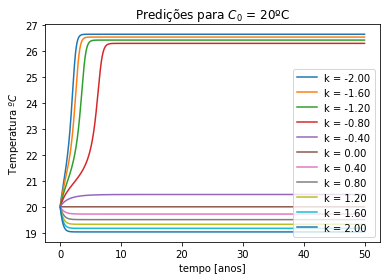

Bot: Bom dia, tarde ou noite. Esse programa tem como objetivo desenhar o grafico da temperatura ao longo dos anos. Por favor, responda as perguntas a seguir para que o programa funcione corretamente.
Bot: Uma dica: colocando 999 como resposta em qualquer uma das perguntas, o programa retornará o exemplo das professoras.
Quantos k's você quer testar? 999


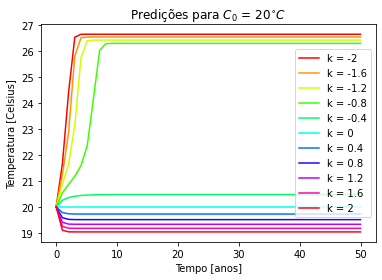

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from IPython.display import Image


# Descrição do funcionamento desse codigo!

#Descrição: Ele resolve a EDO da questão 1 do curso de Python
#Nota: O programa não é 100% a prova de falhas AINDA!


#Nota: Procurar versões mais simples de implementar!
# Função responsavel por eu não precisar criar uma lista gigante de cores
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

#Primeiro definimos a função DC, sendo ela
def modelo(temperatura,t,valores_k):
  dcdt = (1/10)*(temperatura - 20)*(22- temperatura)*(temperatura - 26) - valores_k
  return dcdt


def adquirir_quantidade_de_ks_e_seus_valores():
  global flag
  global flag_exemplo_professora
  global valores_k
  while flag == False:
    try:
      n_k = int(input("Quantos k's você quer testar? "))
      flag = True
      if n_k == 999:
        flag_exemplo_professora = True;
        break
    except ValueError or IndentationError or SyntaxError:
      print("Oops! Você acabou digitando algo que não podia. Bom aqui vai uma lista do que você pode ter errado: Usou caracteres especiais ou letras, clicou enter, tentou hackiar o CERN (To de olho Gabriel, fica esperto @-@)  ")
      flag = False
  #Protegendo o codigo de pessoas que podem querer quebrar ele. ACHO que protegi contra tudo kkkkkk
  if n_k == 1:
    valor_k = float(input("Entre com o valor de k: "))
    valores_k.append(valor_k)
  elif n_k < 1:
    print("Eu vi o que você fez ai \(@o@)/ Tenta de novo parceiro mas dessa vez com 1 ou mais valores de k")
    while n_k < 1:
      try:
        n_k = int(input("Quantos k's você quer testar? "))
        if n_k == 999:
          flag_exemplo_professora = True;
        if n_k < 0:
          print("Por favor, escreve um número maior, ou igual, a 1...")
      except ValueError:
        print(" Talvez você não saiba português, então aqui vai: Oops!  That was no valid number.  Try again...")
  if n_k > 1:  
    for x in range(n_k):
      if  flag_exemplo_professora == True:
        valores_k = [-2,-1.6,-1.2,-0.8,-0.4,0,0.4,0.8,1.2,1.6,2]
        break
      flag_2 = False
      while flag_2 == False:
        try:
          valor_k = float(input("Entre com os valores do k: "))
          flag_2 = True
          if valor_k == 999:
            flag_exemplo_professora = True;
        except ValueError or IndentationError or SyntaxError:
          print("Oops! Você acabou digitando algo que não podia. Bom aqui vai uma lista do que você pode ter errado: Usou caracteres especiais ou letras, clicou enter...Ta tentando hackiar o CERN de novo, Gabriel??  ")
          flag_2 = False 
      valores_k.append(valor_k)  

def adquirir_valor_da_temperatura():
  global flag_3
  global flag_exemplo_professora
  global temperatura
  while flag_3 == False:
    if flag_exemplo_professora == True:
      temperature = 20
      break
    try:
      temperatura = float(input("Entre com o valor da temperatura, em graus celsius, no equador:"))
      if temperatura < -273:
        print("Infelizmente o resultado do programa não deve representar a realidade. Mas pra consulta aqui está o resultado:")
      flag_3 = True
      if temperatura == 999:
        flag_exemplo_professora = True;
    except ValueError or IndentationError or SyntaxError:
      print("Oops! Você acabou digitando algo que não podia. Bom aqui vai uma lista do que você pode ter errado: Usou caracteres especiais ou letras, clicou enter...Gabriel eu juro que se for você...  ")
      flag_3 = False 
  if flag_exemplo_professora == True:
    valores_k = [-2,-1.6,-1.2,-0.8,-0.4,0,0.4,0.8,1.2,1.6,2]
    temperatura = 20



def fazer_hist():
  cmap = get_cmap(len(valores_k))
  for i in range(len(valores_k)):
    #Resolvendo a EDO
    y = odeint(modelo,temperatura,t,args=(valores_k[i],))
    labels = 'k = '+ str(valores_k[i])
    plt.plot(t,y,label=labels,color = cmap(i))
  titulo = r"Predições para $C_{0}$ = $"+str(temperatura)+ r" ^{\circ}C$"
  plt.xlabel("Tempo [anos]")
  plt.ylabel("Temperatura [Celsius]")
  plt.title(titulo)
  plt.legend()
  plt.show()

######################################################################################################
# MAIN 
print("Bot: Bom dia, tarde ou noite. Esse programa tem como objetivo desenhar o grafico da temperatura ao longo dos anos. Por favor, responda as perguntas a seguir para que o programa funcione corretamente.")
print("Bot: Uma dica: colocando 999 como resposta em qualquer uma das perguntas, o programa retornará o exemplo das professoras.")
#determinando o tempo
t = np.linspace(0,50)     #50 anos de 1 em 1 ano 
flag_exemplo_professora = False # Se ela estiver verdadeira, vai gerar o modelo de exemplo da professora.Pode ser ativada em qualquer umas das etapas de preenchimento de valor, basta colocar 42, que é a resposta para a Grande Pergunta sobre a Vida, o Universo e Tudo o Mais
flag = False   # Flag que determina se o número de ks faz sentido
valores_k = []  # Lista com os valores dos k's
flag_3 = False  # Flag que determina se o valor da temperatura faz sentido
adquirir_quantidade_de_ks_e_seus_valores()    #Adquire a quantidade de k e seus valores
adquirir_valor_da_temperatura()               # Adquire o valor da temperatura em celsius.
fazer_hist()                                  #Faz os histogramas com as informações coletadas.


## Parte 2:
***(4pt)***


Modifique o programa anterior para ser um **módulo**.

Em um novo programa, chame o módulo para obter a solução da equação diferencial para um conjunto de valores variados de $k$ e $C_0$ em uma "_rede_" (ou matriz), isto quer dizer, percorrendo valores de  $k \in [k_{min},k_{max}]$ e $ C_0 \in [C_0^{min},C_0^{max}]$ em intervalos regulares.

A **temperatura de equilibrio** (ou de estabilização) ($T_{fin}$) é aquela que se mantem relativamente estável após um certo intervalo. Para determiná-la, escreva no seu programa um algoritmo que ache este valor e o tempo necessário para chegar nele (quantitativamente). 

Obtenha o valor da temperatura de equilibrio (asintótica) para cada ponto da configuração inicial $(k,C_0)$ e analise as soluções para as diferentes configurações, por exemplo gerando graficos que mostrem a temperatura final em função de $k$ para alguns valores de $C_0$ ou qualquer outra relação relevante (justifique). 

_Dica 1: o gráfico_ $T_{fin} \times k$ _é chamado de diagrama de bifurcação e pode ser usado para responder algumas perguntas da parte 3._

_Dica 2: pode ser usado o gráfico de dispersão `scatter` a opção `c=z` com `cmap` do matplotlib [site](https://matplotlib.org/stable/tutorials/colors/colormaps.html)._

```python
plt.scatter(x,y,c=z,cmap="rainbow")
```



 



#Resposta PARTE 2
A modificação do código para um módulo pode ser vista no cédula abaixo. Ele foi modificado para que pudesse calcular a temperatura de equilíbrio, além de produzir plots de Temperatura inicial X K, K X Temperatura inicial e o grafico de bifurcação. Após o codigo, haverá uma cédula de código responsavel por apresentar as possibilidades do código. Todos os plots produzidos aqui serão utilizados para elucidar as respostas na parte 3.

In [2]:
#PRIMEIRA PARTE da PARTE 2: Modificar o programa anterior para ser um módulo.
#Nota: Essa é uma versão simplificada da apresentada no exercício 1.
#Foram retirados os metôdos de proteção e o sistema de input(), mas funciona perfeitamente.
%%writefile Parte_1.py
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt



#Primeiro definimos a função DC, sendo ela
def modelo(temperatura,t,valores_k):
  dcdt = (1/10)*(temperatura - 20)*(22- temperatura)*(temperatura - 26) - round(valores_k,1)
  return dcdt

def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)


def adquirir_valores_e_fazer_plots(valores_k,lista_temperatura,size=(15,6),flag_quero_temp_equilibrio=False, flag_inverter=False,flag_KxT=False,tipo=0):
  #determinando o tempo
  t = np.linspace(0,50)     #5 anos de 1 em 1 ano
  if flag_KxT:
    lista_temperatura_equilibrio=[]
    lista_valores_k=[]
    lista_temperatura_inicial = []
    if isinstance(valores_k,np.ndarray):
      cmap = get_cmap(len(lista_temperatura))
      for i in range(len(valores_k)):
        #Resolvendo a EDO
        for x in range(len(lista_temperatura)):
          y = odeint(modelo,lista_temperatura[x],t,args=(round(valores_k[i],3),))
          flag_equilibrio,tempo_pro_equilibrio,valor_da_temperatura_de_equilibrio =  achar_temperatura_equilibrio_e_tempo_pra_chegar_nela(y)
          lista_temperatura_equilibrio.append(valor_da_temperatura_de_equilibrio)
          lista_valores_k.append(valores_k[i])
          lista_temperatura_inicial.append(lista_temperatura[x])
          if flag_equilibrio and flag_quero_temp_equilibrio:
            labels = r'$C_{0}$: ' + str(round(lista_temperatura[x],1)) + r';$T_{fin}$:' + str(valor_da_temperatura_de_equilibrio) +r'; Tempo:' + str(tempo_pro_equilibrio)
          else:
            labels = r'$C_{0}$ = '+ str(round(lista_temperatura[x],1))  
      if tipo == 1:
        plt.figure(figsize=size)
        plt.scatter(lista_valores_k,lista_temperatura_inicial,c=lista_temperatura_equilibrio,cmap="rainbow")
        titulo = r"Distribuição $T_{inicial}$ x k"
        plt.xlabel("Valor de k")
        plt.ylabel("Temperatura de inicial [Celsius]")
        cbar=plt.colorbar()
        cbar.ax.set_title(r'$T_{inf}$ [celsius]')
        plt.title(titulo)
      if tipo == 2:
        plt.figure(figsize=size)
        plt.scatter(lista_temperatura_equilibrio,lista_valores_k,c=lista_temperatura_inicial,cmap="rainbow")
        plt.ylabel("Valor de k")
        plt.xlabel("Temperatura de equilibrio [Celsius]")
        cbar = plt.colorbar()
        cbar.ax.set_title(r'$C_{0}$ [celsius]')        
        titulo = r"Distribuição $T_{inf}$ x k"
        plt.title(titulo)
        
      if tipo ==3:
        plt.figure(figsize=size)
        plt.scatter(lista_valores_k,lista_temperatura_equilibrio,c=lista_temperatura_inicial,cmap="rainbow")
        plt.xlabel("Valor de k")
        plt.ylabel("Temperatura de equilibrio [Celsius]")
        cbar=plt.colorbar()
        cbar.ax.set_title(r'$C_{0}$ [celsius]')
        titulo = r"Grafico Bifurcação k x $T_{inf}$"
        plt.title(titulo)
        
      plt.show()  

  if flag_inverter:
    if isinstance(valores_k,np.ndarray):
      cmap = get_cmap(len(lista_temperatura))
      for i in range(len(valores_k)):
        #Resolvendo a EDO
        plt.figure(figsize=size)
        for x in range(len(lista_temperatura)):
          y = odeint(modelo,lista_temperatura[x],t,args=(round(valores_k[i],3),))
          flag_equilibrio,tempo_pro_equilibrio,valor_da_temperatura_de_equilibrio =  achar_temperatura_equilibrio_e_tempo_pra_chegar_nela(y)
          if flag_equilibrio and flag_quero_temp_equilibrio:
            labels = r'$C_{0}$: ' + str(round(lista_temperatura[x],1)) + r';$T_{fin}$:' + str(valor_da_temperatura_de_equilibrio) +r'; Tempo:' + str(tempo_pro_equilibrio)
          else:
            labels = r'$C_{0}$ = '+ str(round(lista_temperatura[x],1))
          ###################################################################################
          plt.plot(t,y,label=labels,color = cmap(x))
        titulo = r"Predições para k = "+str(round(valores_k[i],3))
        plt.xlabel("Tempo [anos]")
        plt.ylabel("Temperatura [Celsius]")
        plt.title(titulo)
        plt.legend( prop={'size': 10})
        plt.show()  
    else:
      for x in range(len(lista_temperatura)):
        plt.figure(figsize=size)
        y = odeint(modelo,lista_temperatura[x],t,args=(round(valores_k,3),))
        flag_equilibrio,tempo_pro_equilibrio,valor_da_temperatura_de_equilibrio =  achar_temperatura_equilibrio_e_tempo_pra_chegar_nela(y)
        #print(flag_equilibrio)
        if flag_equilibrio and flag_quero_temp_equilibrio:
          labels = r'$C_{0}$: ' + str(round(lista_temperatura[x],1)) + r';$T_{fin}$:' + str(valor_da_temperatura_de_equilibrio) +r'; Tempo:' + str(tempo_pro_equilibrio)
        else:
          labels = r'$C_{0}$: '+ str(round(lista_temperatura[x],1))
        plt.plot(t,y,label=labels,color ='green')
        titulo = r"Predições para k = "+str(round(valores_k,3))
        plt.xlabel("Tempo [anos]")
        plt.ylabel("Temperatura [Celsius]")
        plt.title(titulo)
        plt.legend( prop={'size': 10})
        plt.show()  
  if  not (flag_inverter or flag_KxT):
    #Resolvendo a EDO
    for temperatura_inicial in lista_temperatura:
      if isinstance(valores_k,np.ndarray):
        cmap = get_cmap(len(valores_k))
        plt.figure(figsize=size)
        for i in range(len(valores_k)):
          #Resolvendo a EDO
          y = odeint(modelo,temperatura_inicial,t,args=(round(valores_k[i],1),))
          if flag_quero_temp_equilibrio:
            flag_equilibrio,tempo_pro_equilibrio,valor_da_temperatura_de_equilibrio =  achar_temperatura_equilibrio_e_tempo_pra_chegar_nela(y)
            labels = 'k: ' + str(round(valores_k[i],1)) + r';$T_{fin}$:' + str(valor_da_temperatura_de_equilibrio) +r'; Tempo:' + str(tempo_pro_equilibrio)
          else:
            labels = 'k = '+ str(round(valores_k[i],1))
        ###################################################################################
          plt.plot(t,y,label=labels,color = cmap(i))
        titulo = r"Predições para $C_{0}$ = $"+str(temperatura_inicial)+ r" ^{\circ}C$"
        plt.xlabel("Tempo [anos]")
        plt.ylabel("Temperatura [Celsius]")
        plt.title(titulo)
        plt.legend( prop={'size': 10})
        plt.show()
      else:

        y = odeint(modelo,temperatura_inicial,t,args=(round(valores_k,1),))
        #print(flag_equilibrio)
        if flag_quero_temp_equilibrio:
          flag_equilibrio,tempo_pro_equilibrio,valor_da_temperatura_de_equilibrio =  achar_temperatura_equilibrio_e_tempo_pra_chegar_nela(y)
          labels = 'k: ' + str(round(valores_k,1)) + r';$T_{fin}$:' + str(valor_da_temperatura_de_equilibrio) +r'; Tempo:' + str(tempo_pro_equilibrio)
        else:
          labels = 'k = '+ str(round(valores_k,1))
        plt.figure(figsize=size)
        plt.plot(t,y,label=labels,color ='green')
        titulo = r"Predições para $C_{0}$ = $"+str(temperatura_inicial)+ r" ^{\circ}C$"
        plt.xlabel("Tempo [anos]")
        plt.ylabel("Temperatura [Celsius]")
        plt.title(titulo)
        plt.legend( prop={'size': 10})
        plt.show()

#Esse algoritmo considera a temperatura de estabilidade aquela que apresentar 5 ou mais ocorrencias consecutivas e com precisão até a uma casa decimal.
def achar_temperatura_equilibrio_e_tempo_pra_chegar_nela(y):      
  flag_chegamos_no_equilibrio = False
  valor_anterior = -999
  tempo_para_chegar_na_temperatura = -1
  numero_de_ocorrencias = 0
  for valor_temperatura in y:
    #print('valor anterior: ',round(float(valor_anterior),3))
    #print('valor temperatura: ',round(float(valor_temperatura),3))
    if round(float(valor_anterior),2) == round(float(valor_temperatura),2):
      numero_de_ocorrencias += 1
      valor_anterior = valor_temperatura
    elif valor_anterior != valor_temperatura:
      numero_de_ocorrencias = 0
      valor_anterior = valor_temperatura
    #print(numero_de_ocorrencias)
    if numero_de_ocorrencias > 5:            # optei por escolher o valor da temperatura se ele se mantiver por mais de 5 anos.
      flag_chegamos_no_equilibrio = True
      tempo_para_chegar_na_temperatura = list(y).index(valor_temperatura)
      break
    #print('-----------------')
  #print(flag_chegamos_no_equilibrio)  
  return flag_chegamos_no_equilibrio,tempo_para_chegar_na_temperatura, round(float(valor_temperatura),2)



#Lista_das_temperaturas = np.linspace(19,30,12)#np.arange(20,30,)                      
#Lista_dos_valores_de_k = np.linspace(-2,2,81)#np.arange(-2,2,0.2)

Lista_das_temperaturas = np.linspace(19,30,56)#np.arange(20,30,)                      
Lista_dos_valores_de_k = np.linspace(-2,2,41)#np.arange(-2,2,0.2)
#print(Lista_das_temperaturas)
Lista_das_temperaturas = np.arange(20,30,2)                      
Lista_dos_valores_de_k = np.arange(-4,4,1) 
adquirir_valores_e_fazer_plots(Lista_dos_valores_de_k,Lista_das_temperaturas,flag_quero_temp_equilibrio=True)

Writing Parte_1.py


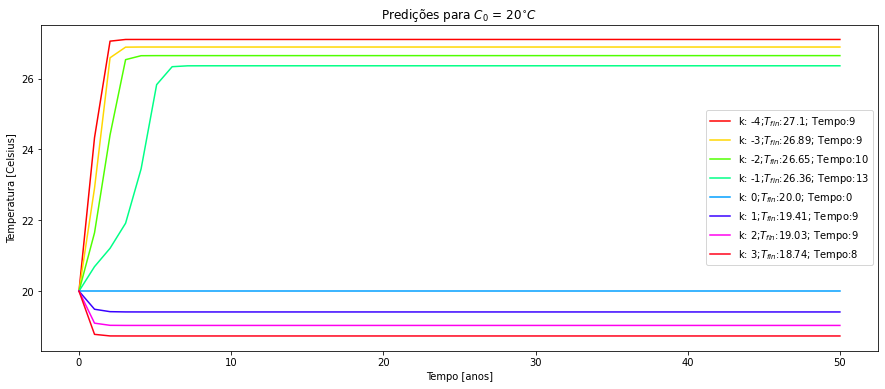

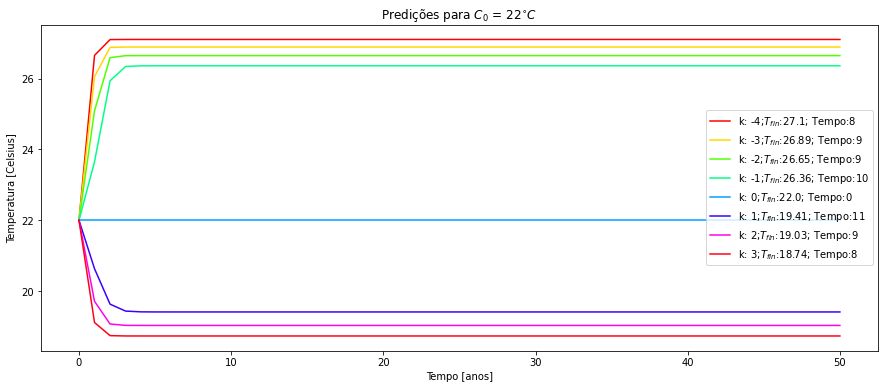

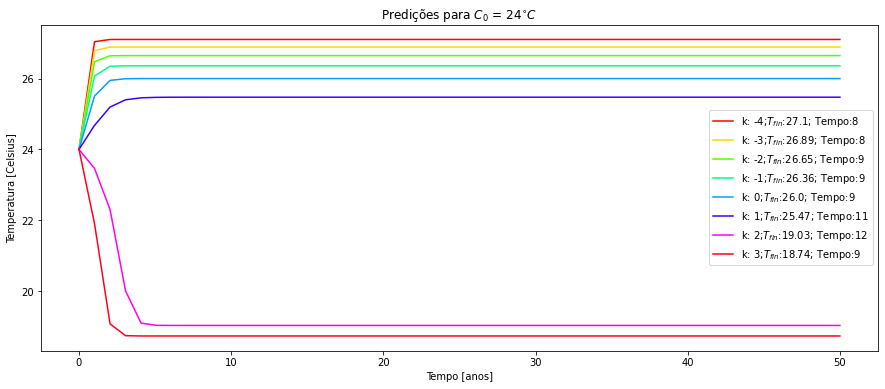

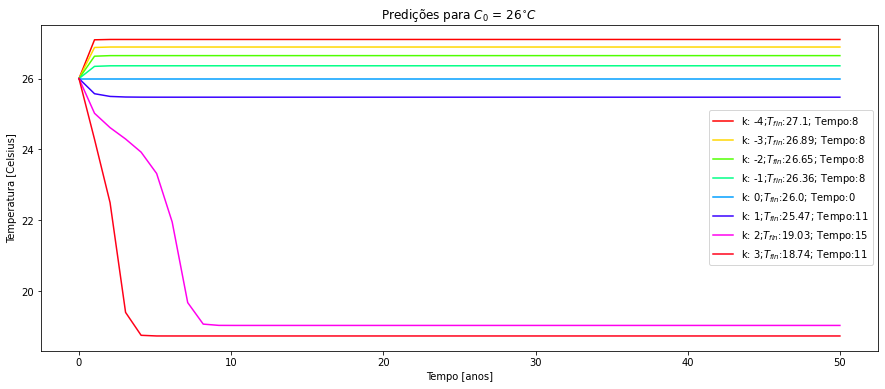

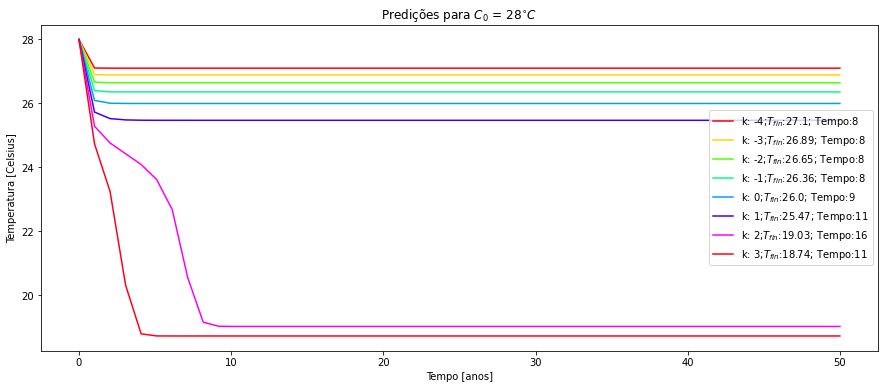

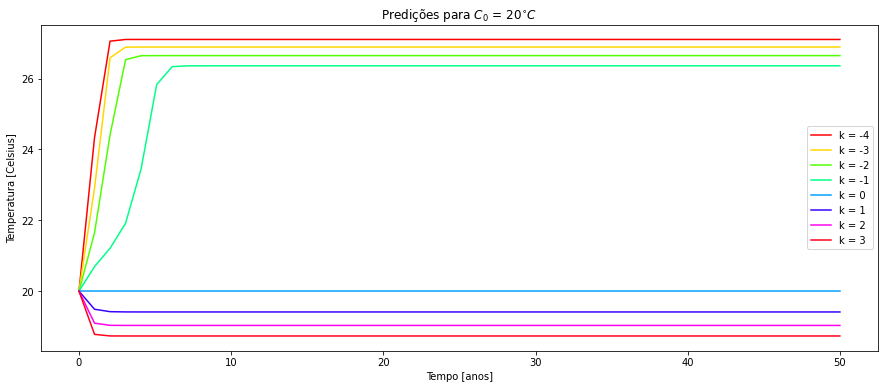

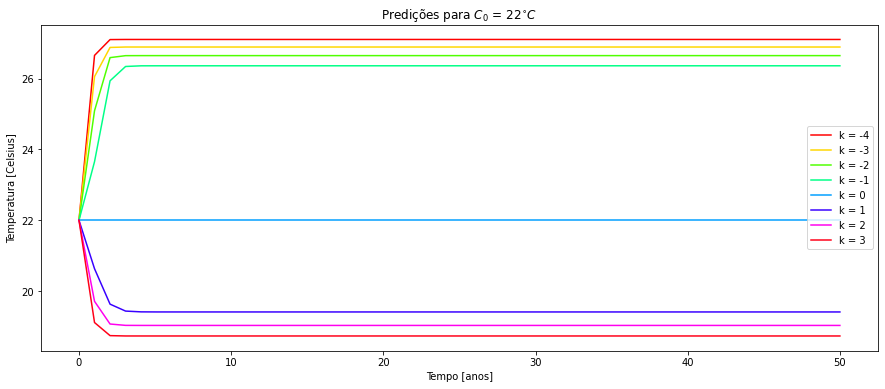

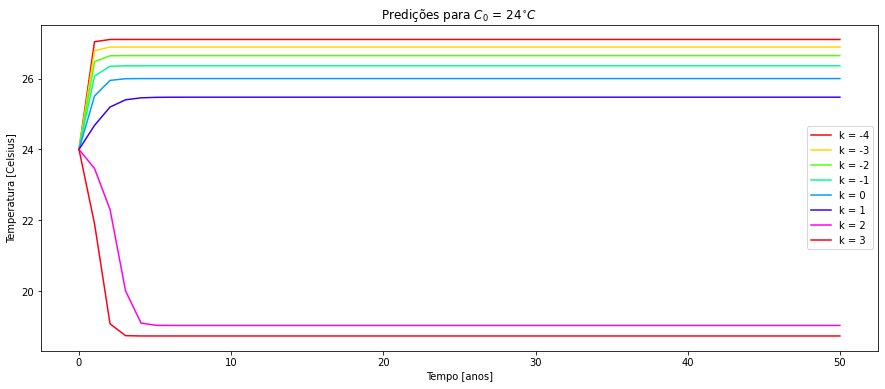

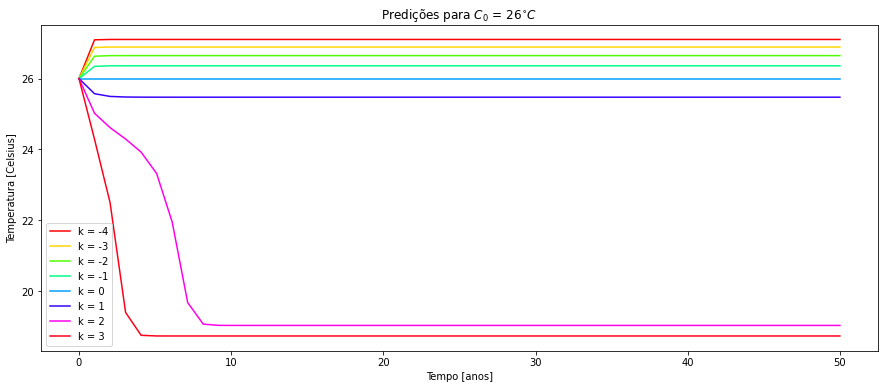

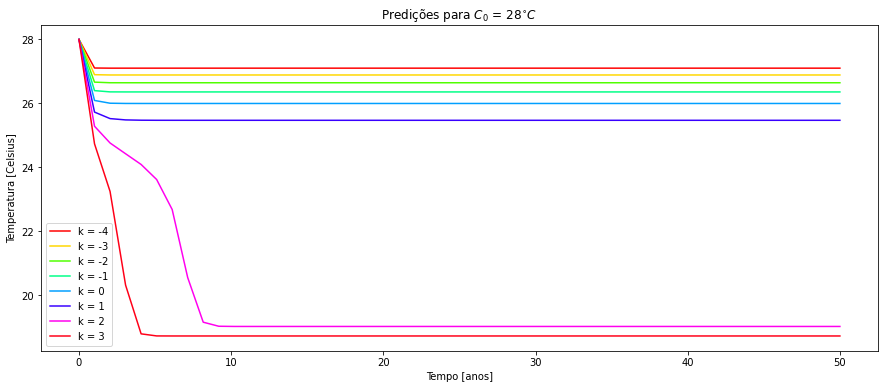

In [3]:
 #Primeira parte da PARTE 2:  Solução da equação diferencial para um conjunto de valores variados de k e C0 em uma "rede" (ou matriz)
 from Parte_1 import *               #Importanto todas os pacotes que o Parte_1 tem
 import Parte_1                      #Importando o modulo Parte_1

#Exemplos de criação de plots Versão normal, ou seja, todos as flags como false.
#Primeiro declaramos as listas que serão utilizadas
Lista_das_temperaturas = np.arange(20,30,2)                      
Lista_dos_valores_de_k = np.arange(-4,4,1) 
#Agora utilizamos a função do nosso módulo:                  
Parte_1.adquirir_valores_e_fazer_plots(Lista_dos_valores_de_k,Lista_das_temperaturas)

#É possível acrescentar QUANTOS C_0 e ks quiser, contudo, esse programa não esta preparado para apresentar, de forma interressante, valores muito grandes.
 

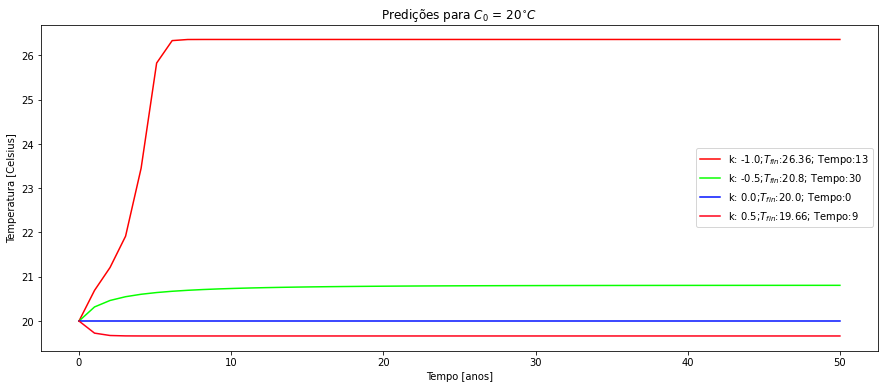

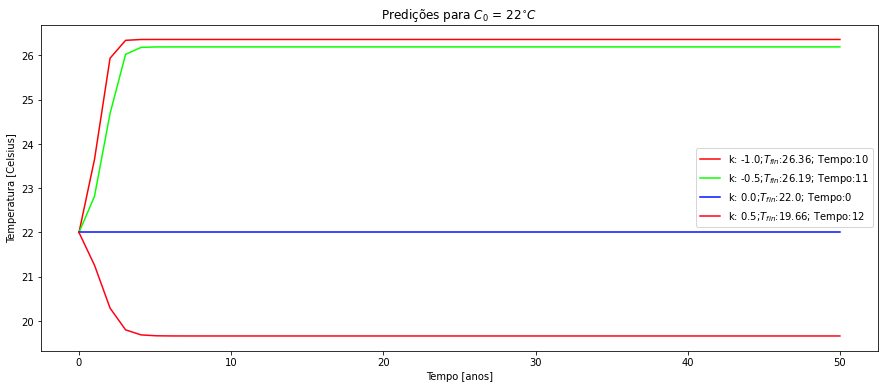

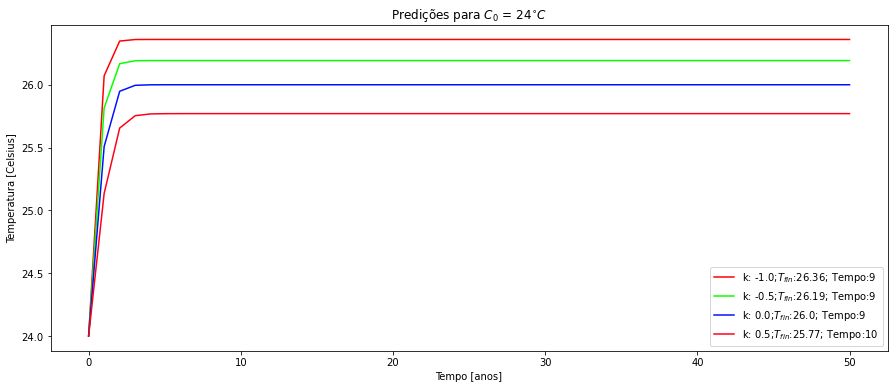

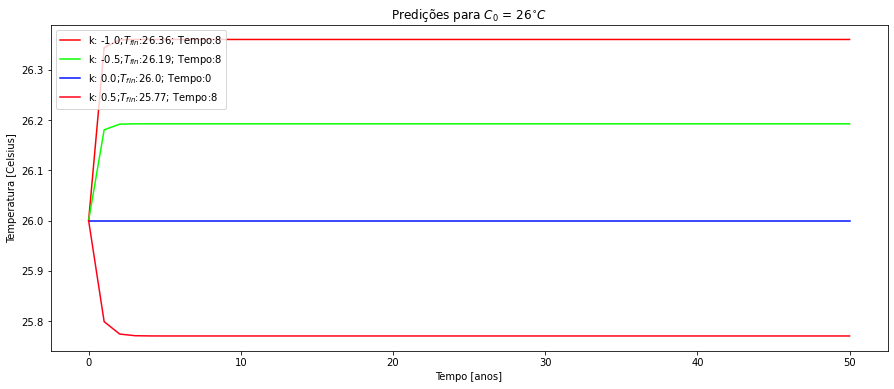

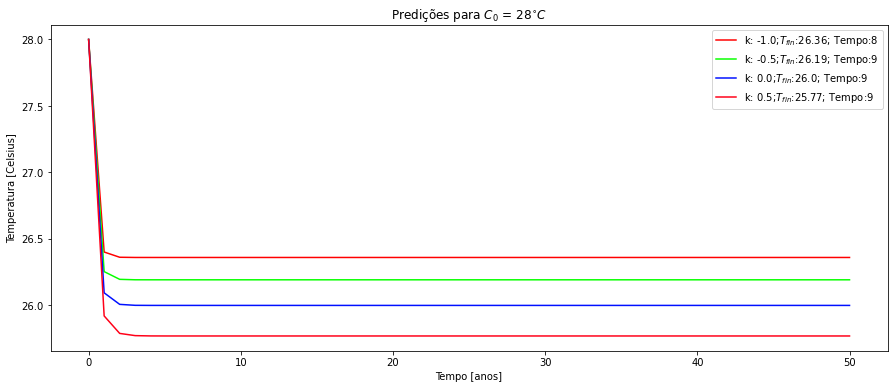

In [4]:
#Segunda parte da PARTE 2: Escrever no seu programa um algoritmo que ache a temperatura de quilíbrio e o tempo necessário para chegar nele (quantitativamente)
from Parte_1 import *               #Importanto todas os pacotes que o Parte_1 tem
import Parte_1                      #Importando o modulo Parte_1

#Exemplo de como adquirir os valores da temperatura de equilibrio e o tempo necessário para adquiri-la
#Nota:O nosso código foi feito considerando como temperatura de equilibrio aquela que repetisse o valor 5 vezes consecutivas ao longo dos anos, com precisão de 3 casas decimais.
#Declaramos a lista que será utilizada
Lista_das_temperaturas = np.arange(20,30,2)                      
Lista_dos_valores_de_k = np.arange(-1,1,0.5)

Parte_1.adquirir_valores_e_fazer_plots(Lista_dos_valores_de_k,Lista_das_temperaturas,flag_quero_temp_equilibrio=True)


Adquirimos então o gráfico de bifurcação através da seguinte cédula de código:

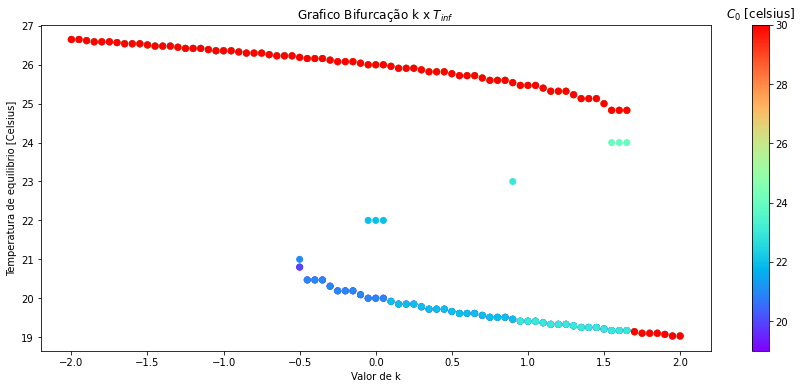

In [5]:
#Terceira parte da PARTE 2: Obtenha o valor da temperatura de equilibrio (asintótica) para cada ponto da configuração inicial $(k,C_0)$ 
#e analise as soluções para as diferentes configurações, por exemplo gerando graficos que mostrem a temperatura final em função de $k$ para alguns valores de $C_0$
from Parte_1 import *               #Importanto todas os pacotes que o Parte_1 tem
import Parte_1                      #Importando o modulo Parte_1

#Exemplo de como adquirir o gráfico de bifurcação entre os valores da temperatura de equilibrio e os de k
#Nota:O nosso código foi feito considerando como temperatura de equilibrio aquela que repetisse o valor 5 vezes consecutivas ao longo dos anos, com precisão de 3 casas decimais.
#Declaramos a lista que será utilizada
Lista_das_temperaturas = np.linspace(19,30,12)#np.arange(20,30,2)                      
Lista_dos_valores_de_k = np.linspace(-2,2,81)#np.arange(-2,2,0.2)

#print(Lista_das_temperaturas)
Parte_1.adquirir_valores_e_fazer_plots(Lista_dos_valores_de_k,Lista_das_temperaturas,flag_KxT=True,tipo= 3)

E mais facil ver o que o grafico de bifurcação est´nos dizendo se invertermos os eixos:




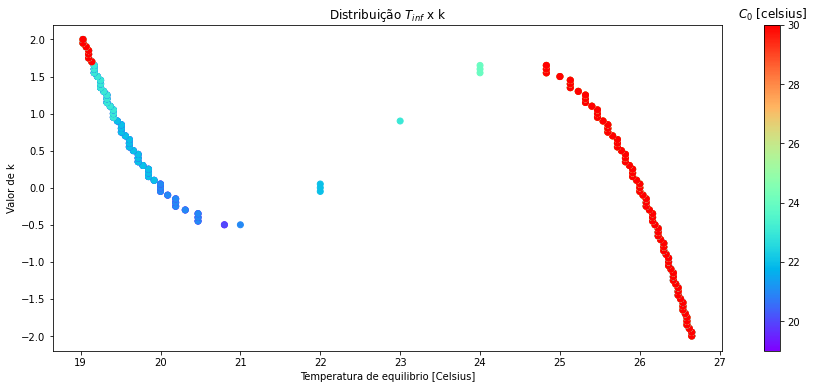

In [6]:
Parte_1.adquirir_valores_e_fazer_plots(Lista_dos_valores_de_k,Lista_das_temperaturas,flag_KxT=True,tipo= 2)

Podemos reparar do segundo plot que para alguns valores de k, encontramos 1, 2 ou até 3 temperaturas finais. Isso fica mais claro no plot da temperatura inicial por valor de k, com a informação da temperatura final. Esse grafico pode ser visto a seguir:

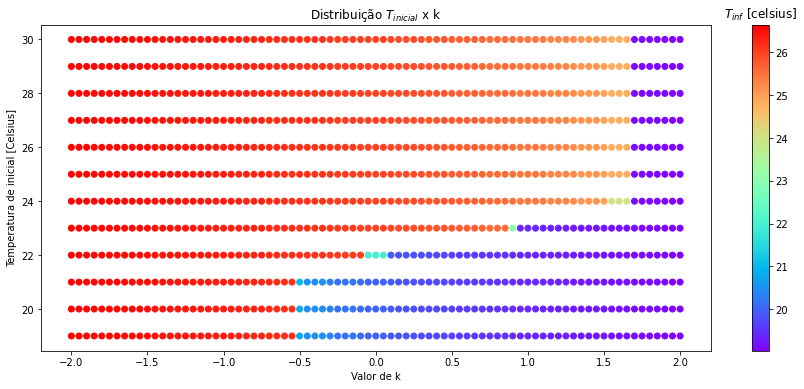

In [7]:
Parte_1.adquirir_valores_e_fazer_plots(Lista_dos_valores_de_k,Lista_das_temperaturas,flag_KxT=True,tipo= 1)

Através dele fica claro que no intervalo de k= ]-inf,-0.6], a temperatura final converge para somente um valor, no intervalo de k=]-0.6,-0[ existem duas temperatura finais possíveis, no pontos envolta do k=0 há três valores possíveis de temperatura final, no intervalo de k=]0,0.9[ temos até dois valores de temperatura finais, nos intervalo entorno do k=0.9 temos três valores possíveis, no intervalo de k=]0.9,1.6[ há dois valores possíveis para temperatura final, no ponto k=1.6 há três possiveis valores de temperatura final e no intervalo k=]1.6,inf[ temos somente um valor possível de temperatura final.

Criamos um quarto tipo de distribuição que nós permite ver melhor esses pontos de k e suas tendências de temperatura final. Observando a mudança dos plots ao longo da variação de k, é possivel ver a evolução das possiveis temperatura finais. (Notas do autos: Essa parte ficou bem legal de ver!)

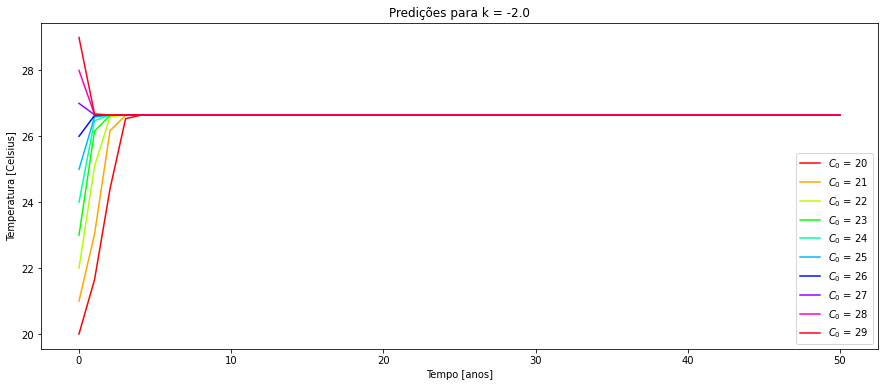

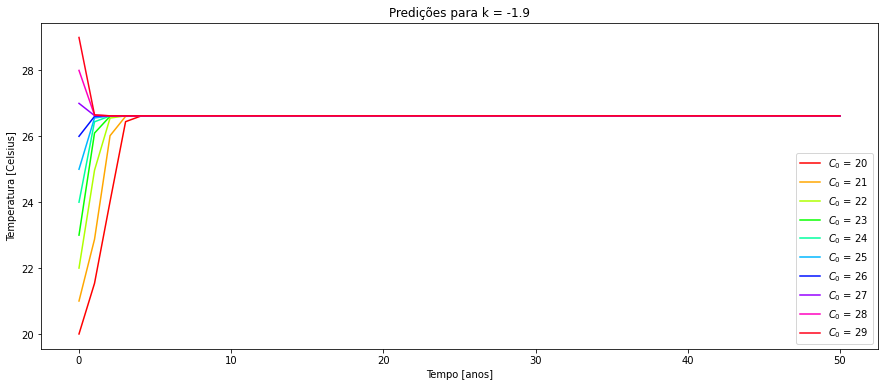

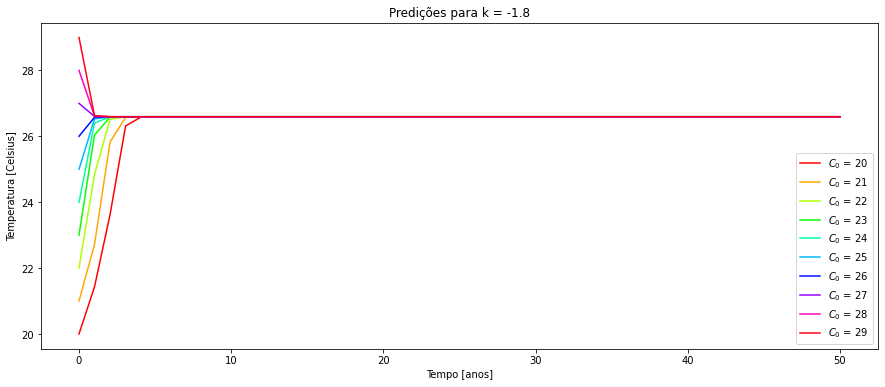

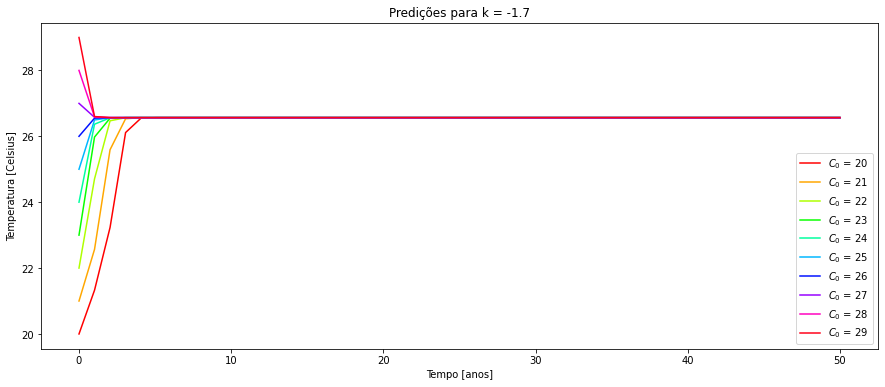

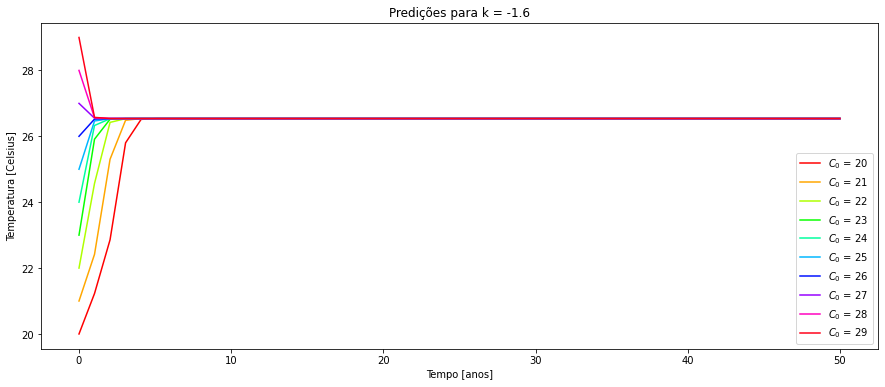

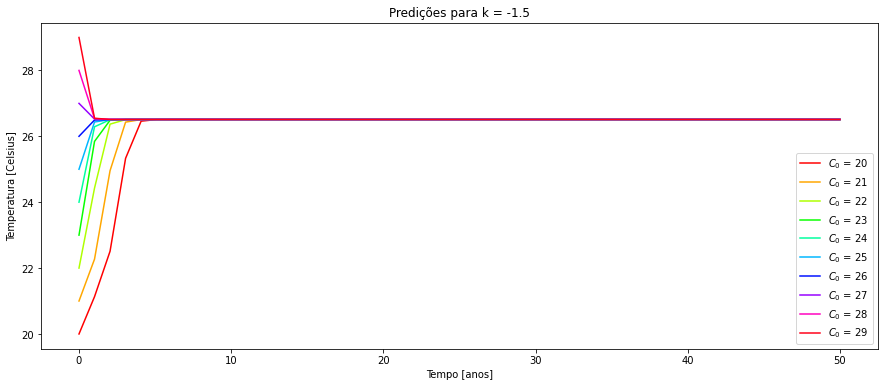

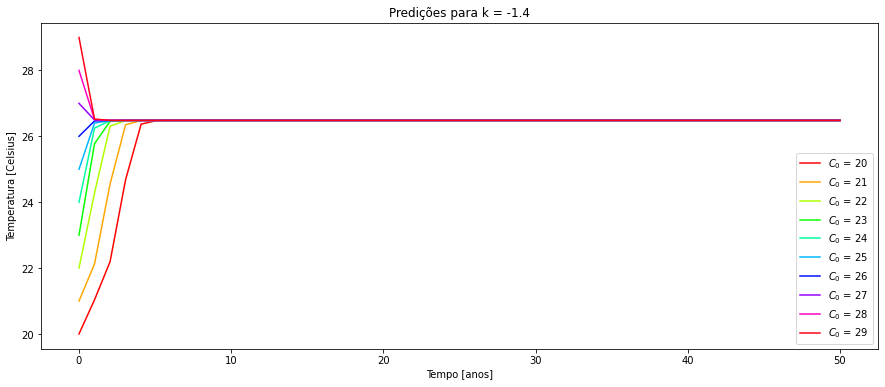

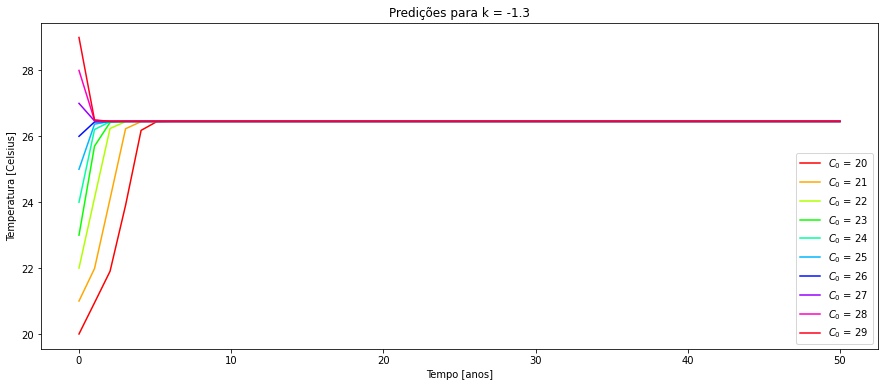

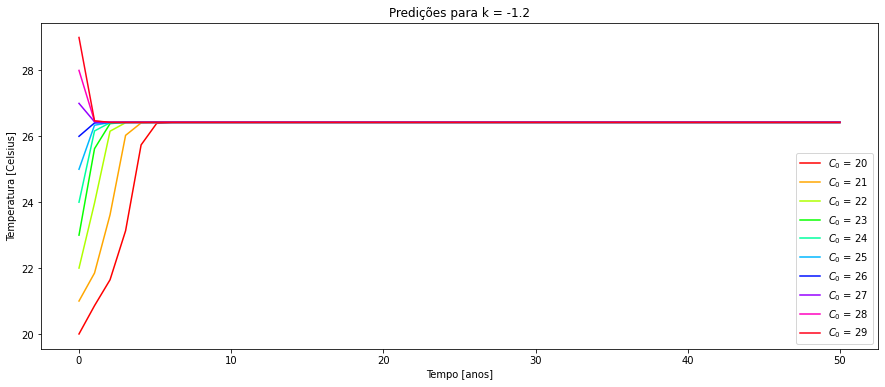

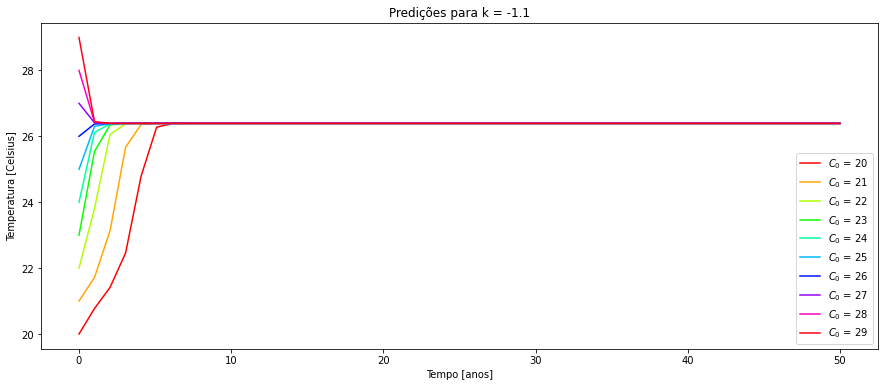

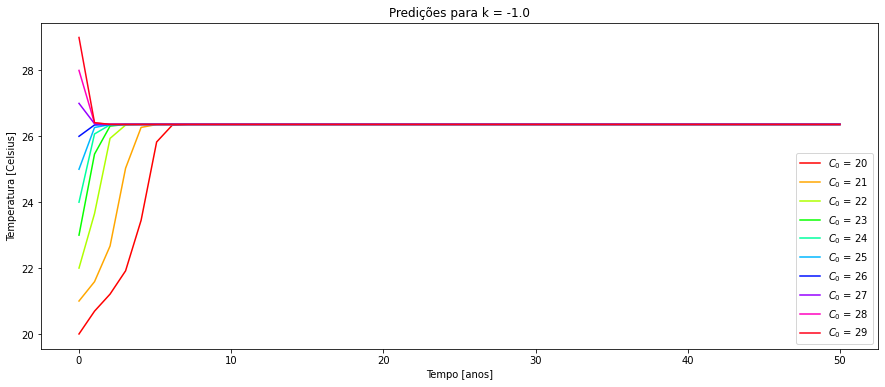

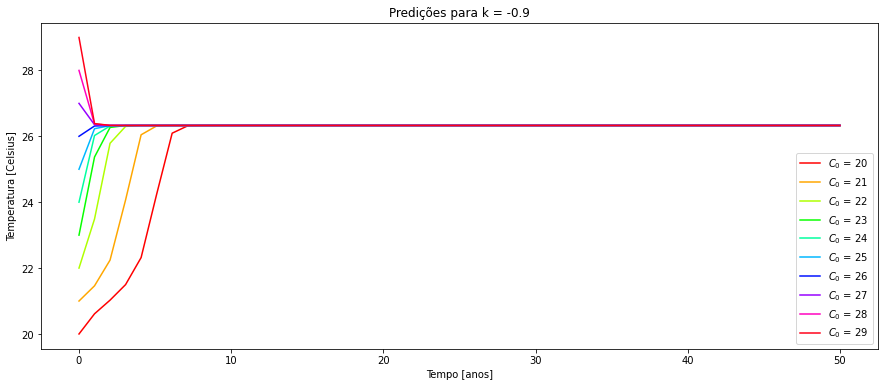

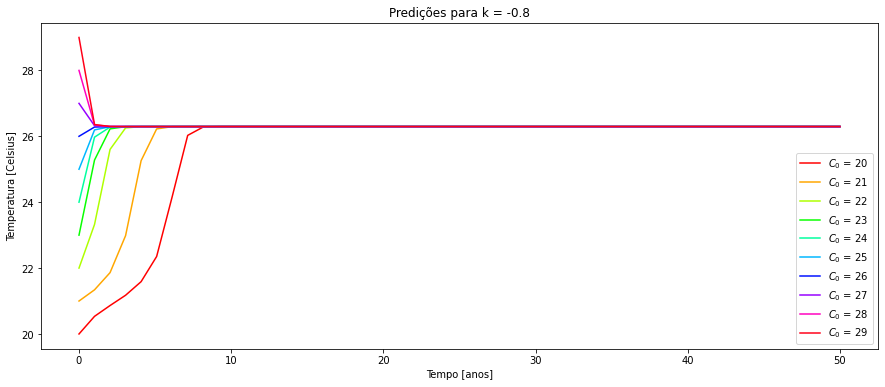

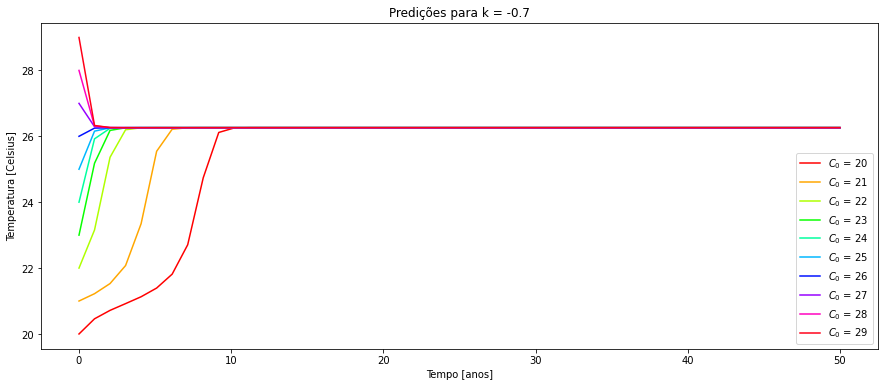

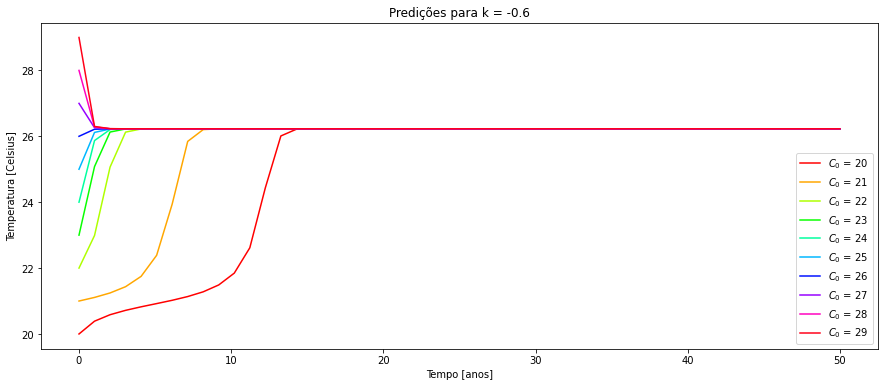

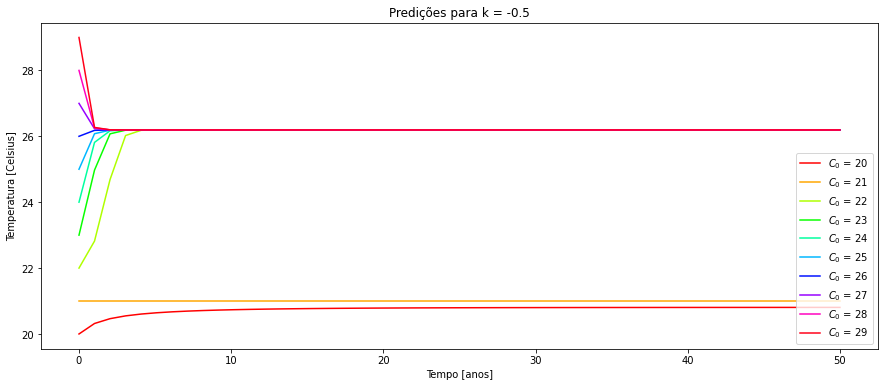

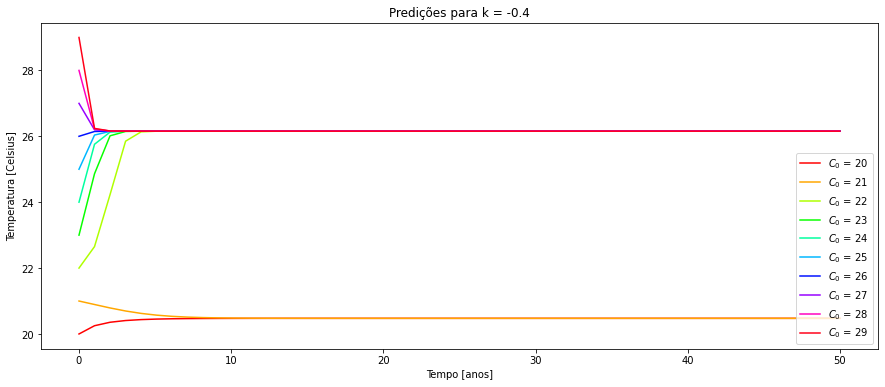

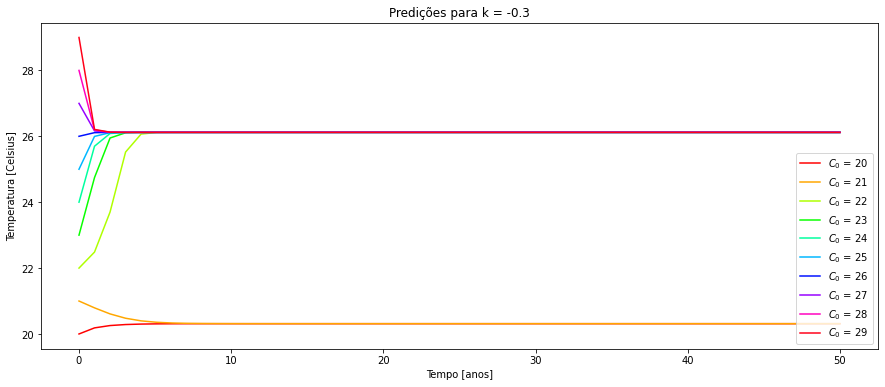

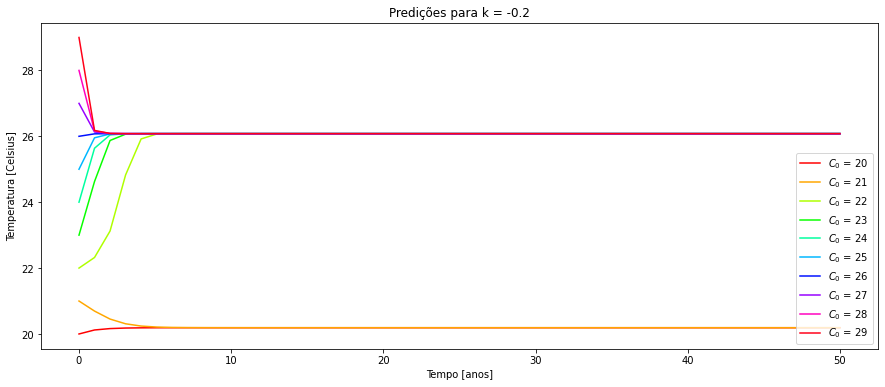

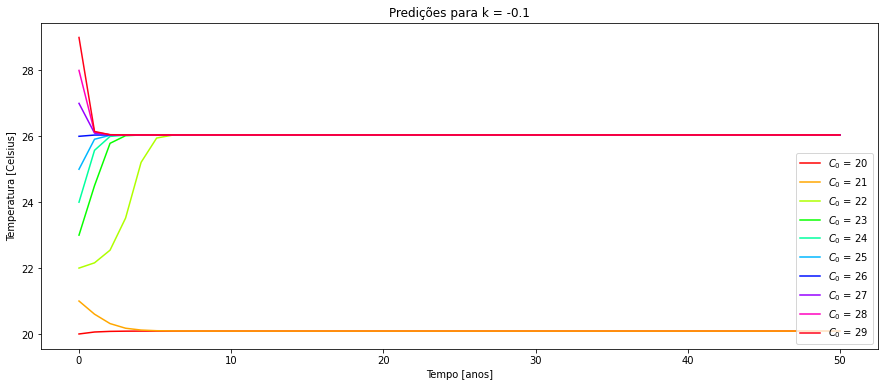

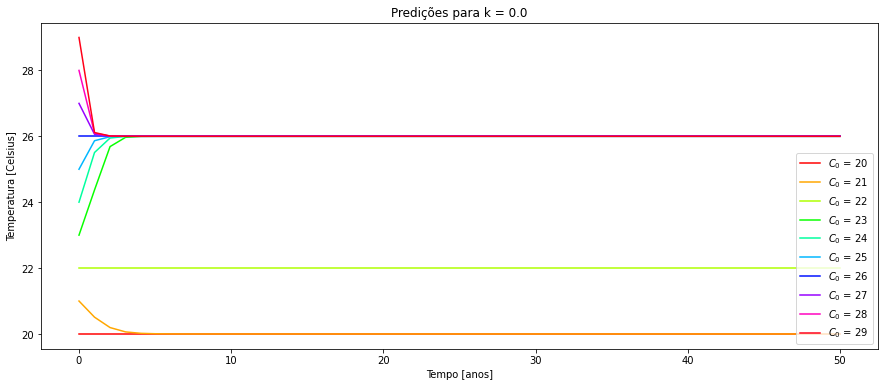

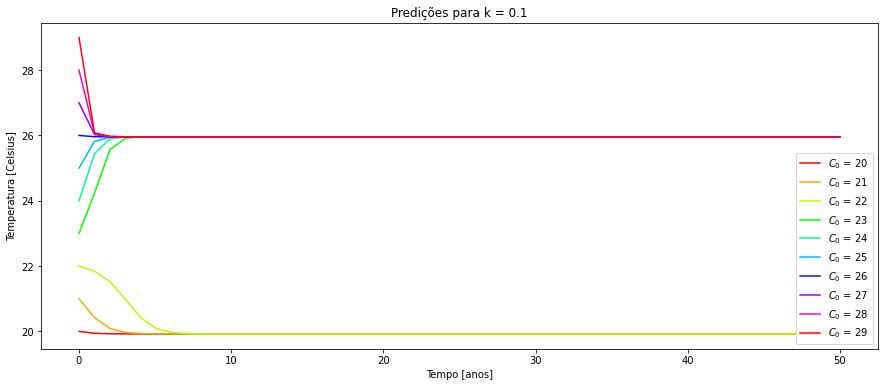

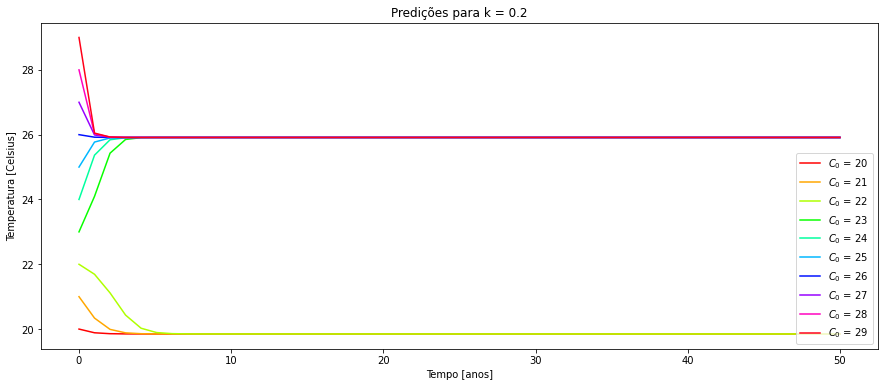

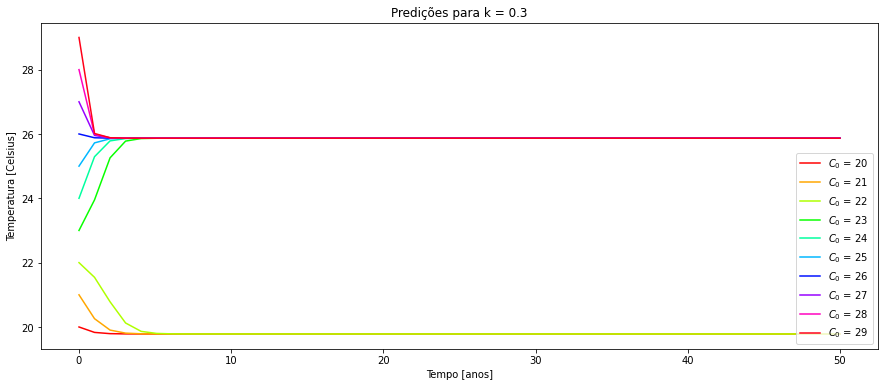

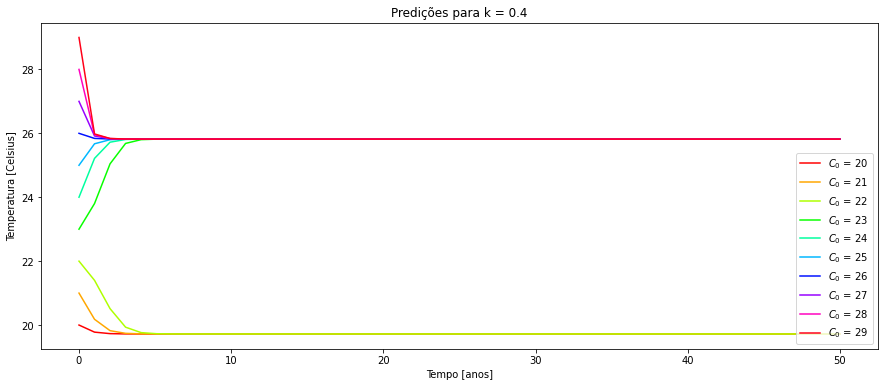

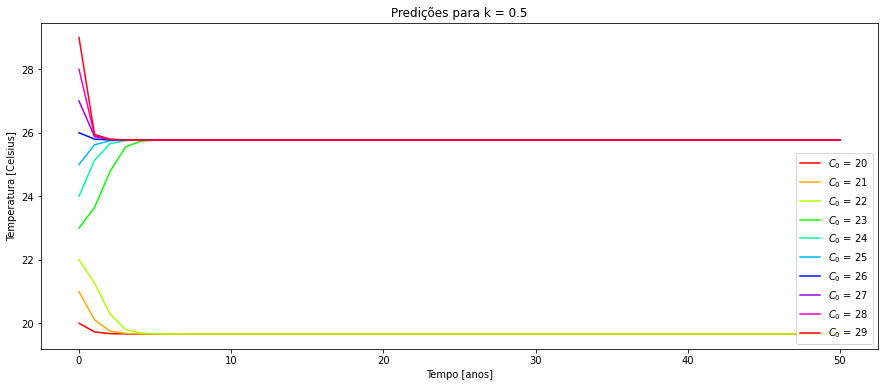

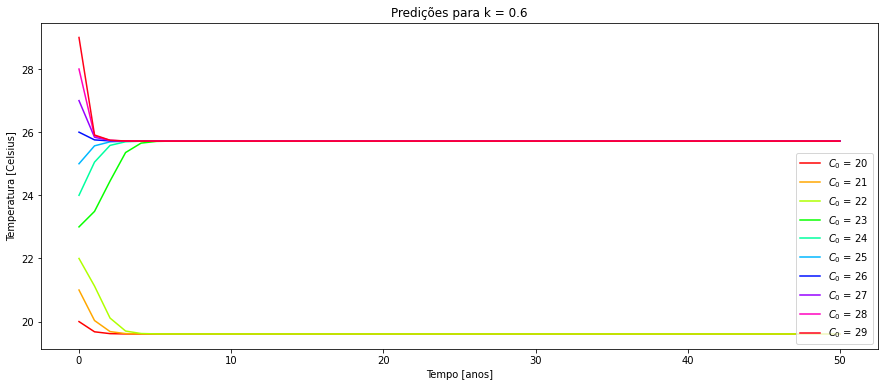

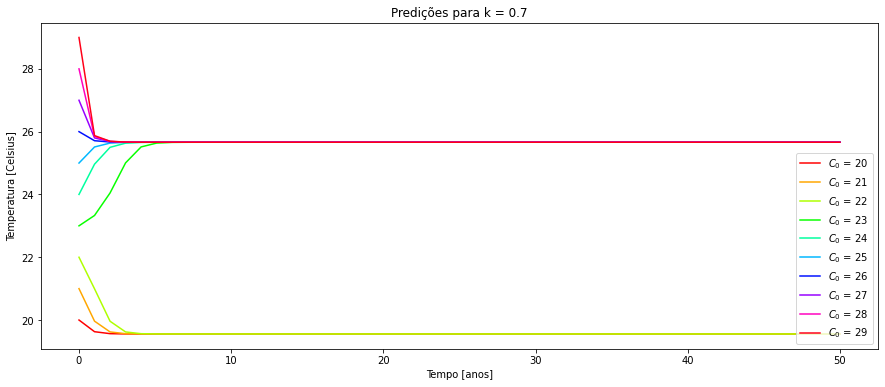

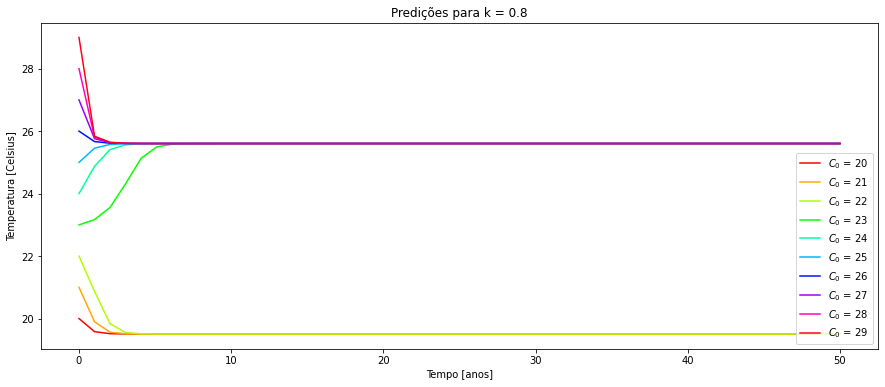

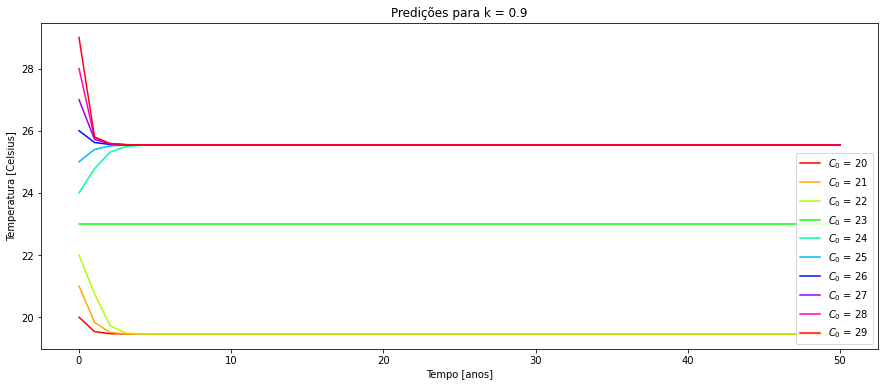

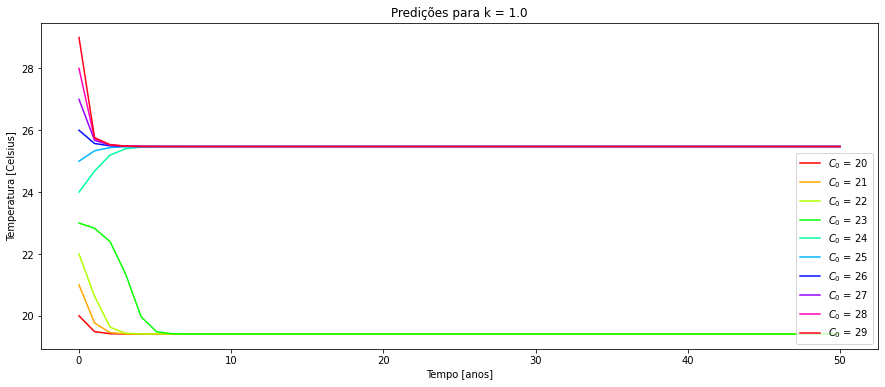

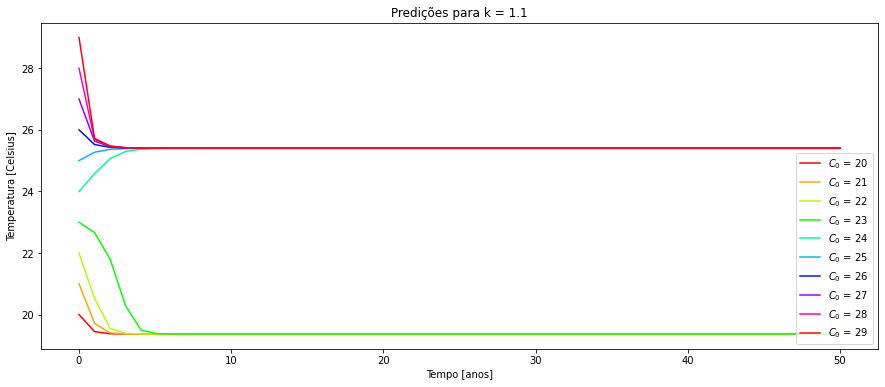

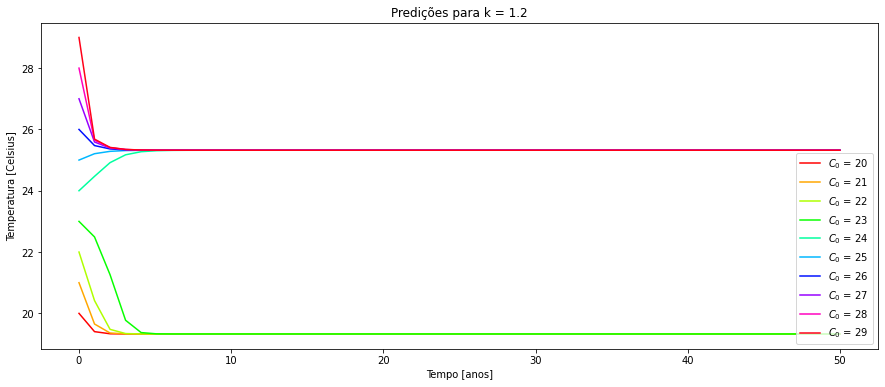

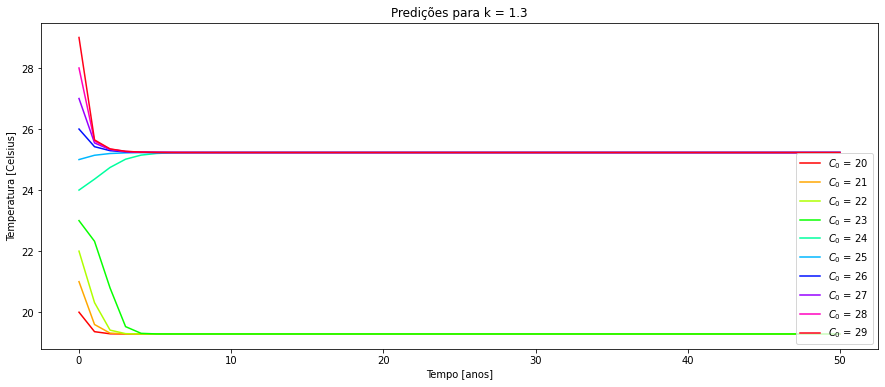

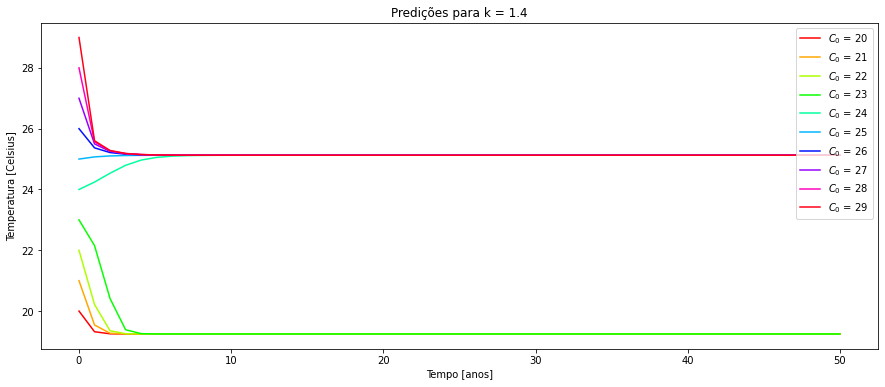

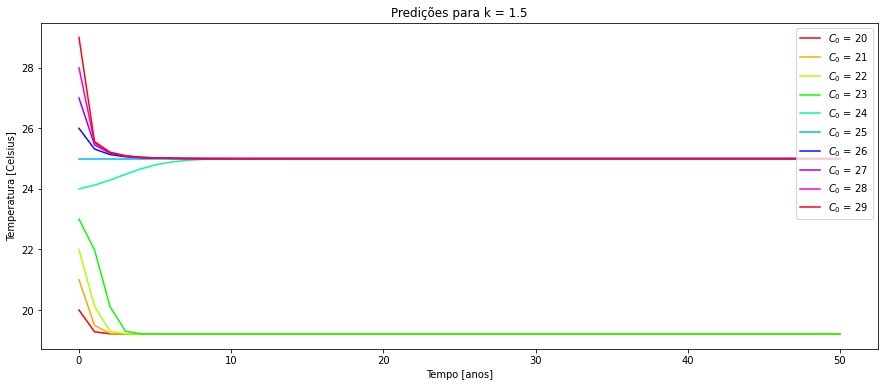

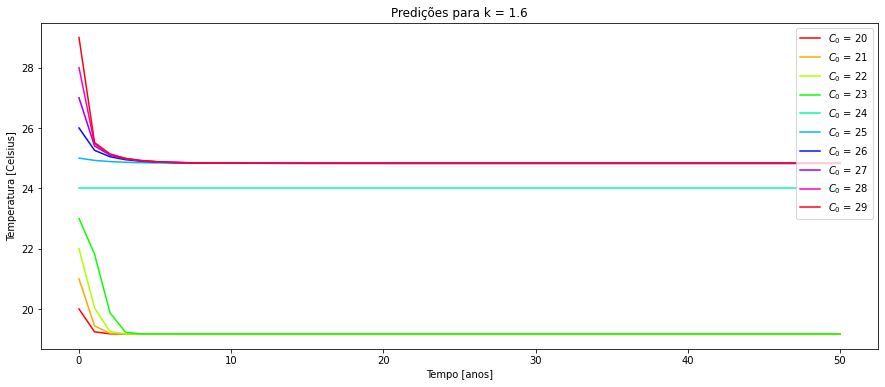

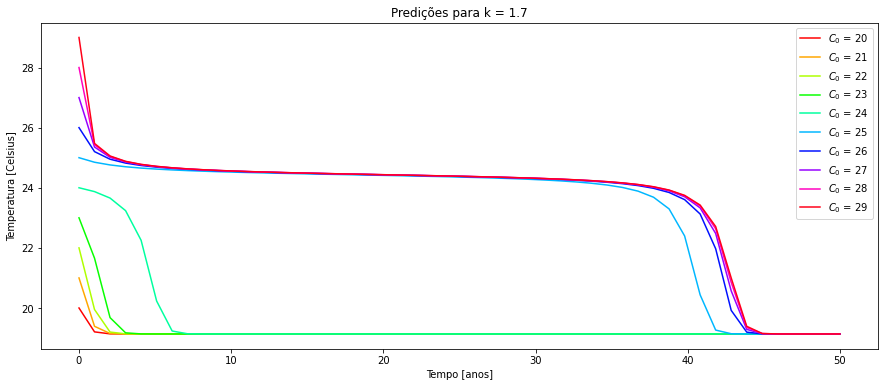

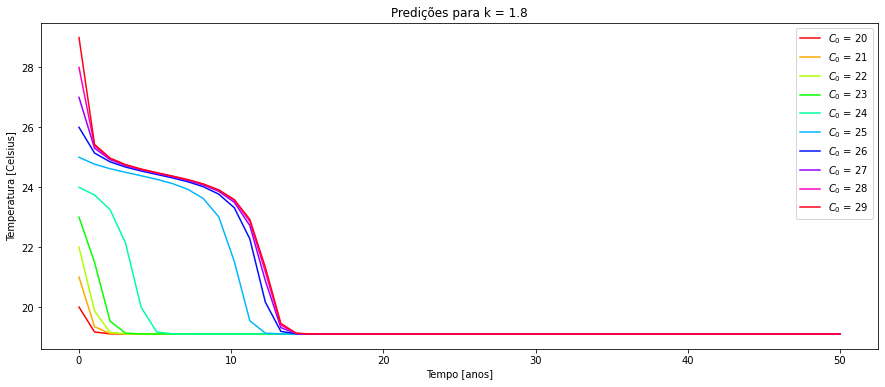

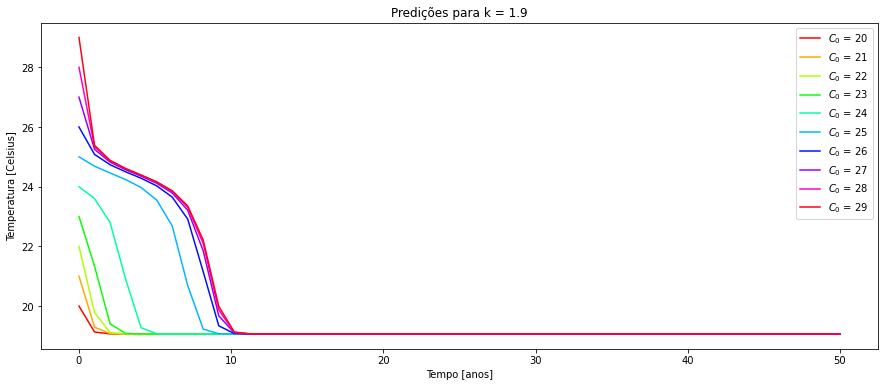

In [8]:
#Terceira parte da PARTE 2: Obter alguma outra distribuição interressante, e justificar.
#Exemplo de como adquirir o gráfico de bifurcação entre os valores da temperatura de equilibrio e os de k
#Declaramos a lista que será utilizada
Lista_das_temperaturas = np.arange(20,30,1)                      
Lista_dos_valores_de_k = np.arange(-2,2,0.1)

Parte_1.adquirir_valores_e_fazer_plots(Lista_dos_valores_de_k,Lista_das_temperaturas,flag_inverter= True)



É possível ver através desses plots que dependendo do valor de k, é possível adquirir 1, 2 ou 3 temperaturas de equilibrio finais. Algo que será explorado mais na parte 3.

## Parte 3:

***(2pt)***


Responda as perguntas,  apresentando cálculos ou gráficos para justificar as suas respostas.

1. O que acontece com a temperatura de estabilização se a _desregularização_  $k$ (negativo) for menor que $\sim -0.6$ ?

1. O que acontece com a temperatura de estabilização se a _regularização_ $k$ (positivo) for maior que $\sim 1.8 $ ?

1. Se $k$ for mantido em 0, o que acontece com a temperatura final para um valor de temperatura inicial $C_0 = 22^{\circ} C$ ?  e se este valor flutuar em $0.1^{\circ} C$ para cima?

1. Modifique seu programa para simular a seguinte situação, começamos com uma temperatura de $21^{\circ}C$ e $k=-0.5$, depois de 5 anos a regulamentação e relaxada ainda mais, com $k=-0.6$.

   a) Qual a temperatura no equador no momento da transição de $k=-0.5$ a $k=-0.6$?

   b) Qual a tendência  da temperatura (ou seja, desce ou sobe) 5 anos após a mudança?

   c) Qual o valor mínimo de $k$ a partir desse momento (10 anos após o começo) para que a temperatura do equador não aumente nos próximos 50 anos?


#PARTE 3 - Resposta da questão 1
Observando os graficos da temperatura em função do tempo e o de bifurcação, é possivel ver que para valores menores k menores que -0.6 as temperaturas finais (de equilibrio) vão convergir pro mesmo valor sempre (algumas mais rapido e outras mais devagar) enquanto que para valores maiores, podem convergir para dois valores. É possivel ver isso nos graficos a seguir:

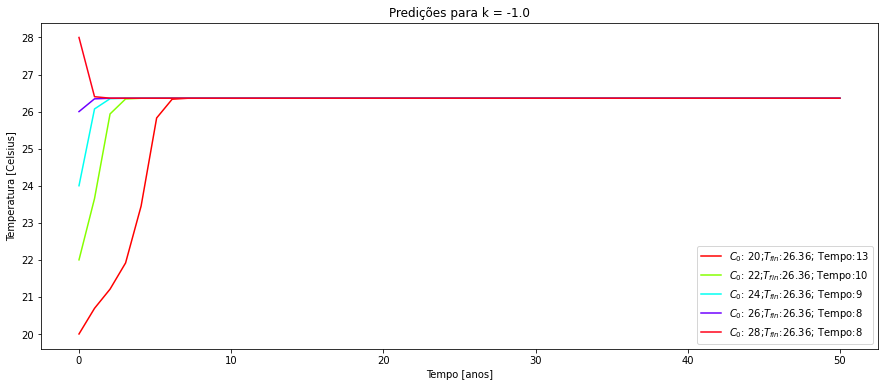

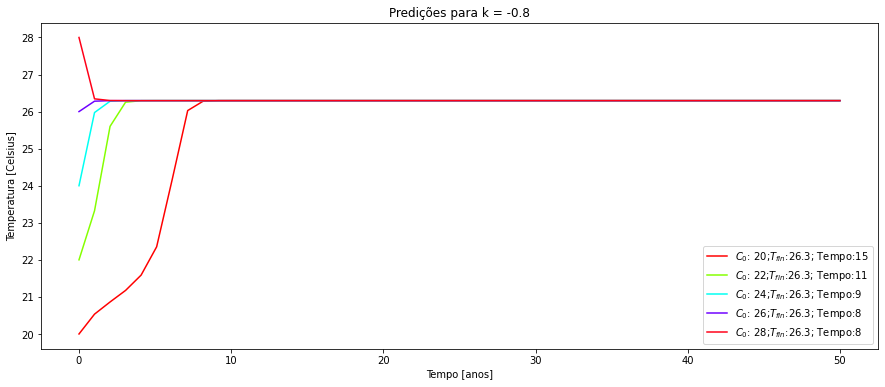

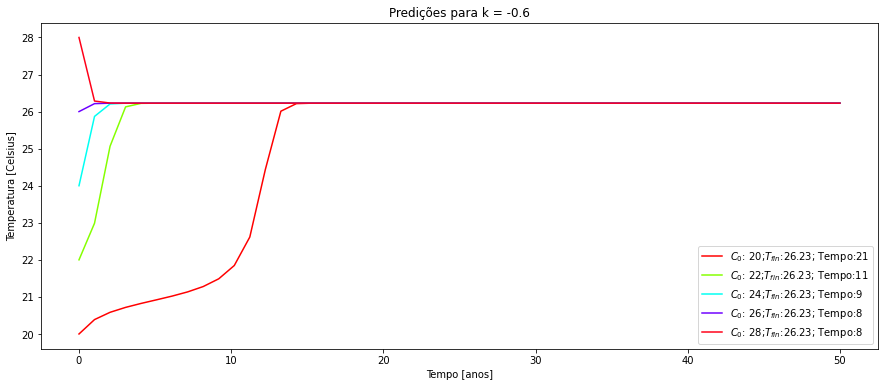

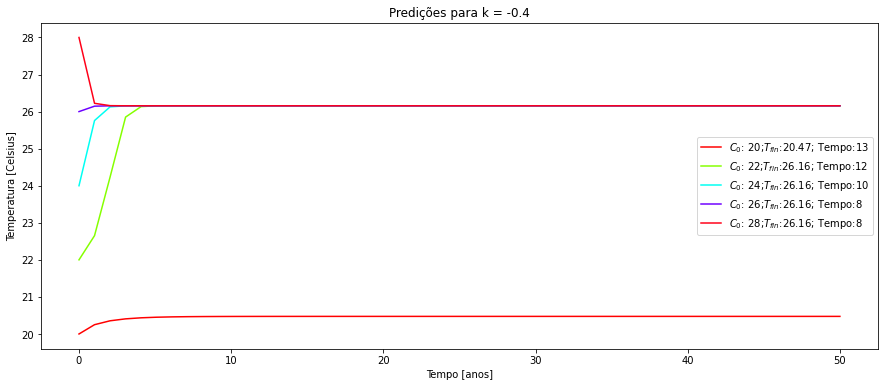

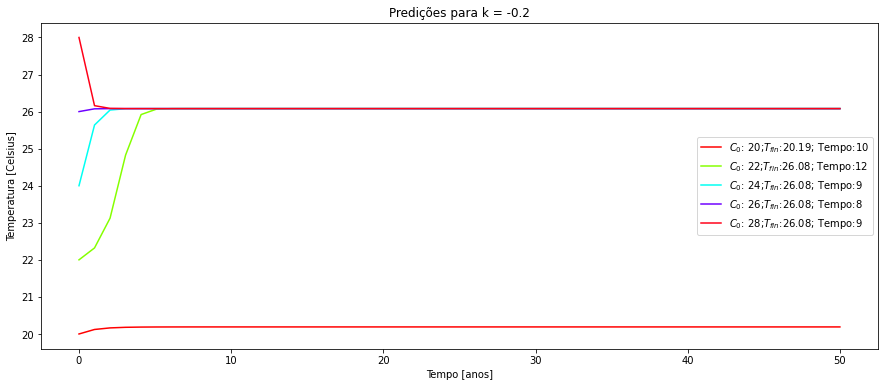

In [9]:
#PARTE 3- QUESTÂO 1

Lista_das_temperaturas = np.arange(20,30,2)                      # Declaração da lista de valores da temperatura, começando com 0 e chegando até 50, em intervalos de 50/10 graus
Lista_dos_valores_de_k = np.arange(-1,0,0.2)                    # Declaração da lista de valores de ks, começando com -3 e chegando até 3, em intervalos regulares de 6/20

Parte_1.adquirir_valores_e_fazer_plots(Lista_dos_valores_de_k,Lista_das_temperaturas,flag_quero_temp_equilibrio=True,flag_inverter=True,flag_KxT=True)

#PARTE 3- Reposta da questão 2
Para valores de k maiores que 1.6, os valores tendem a convergir para uma unica temperatura de equilibrio. Essa conclusão pode ser vista observando os plots a seguir:

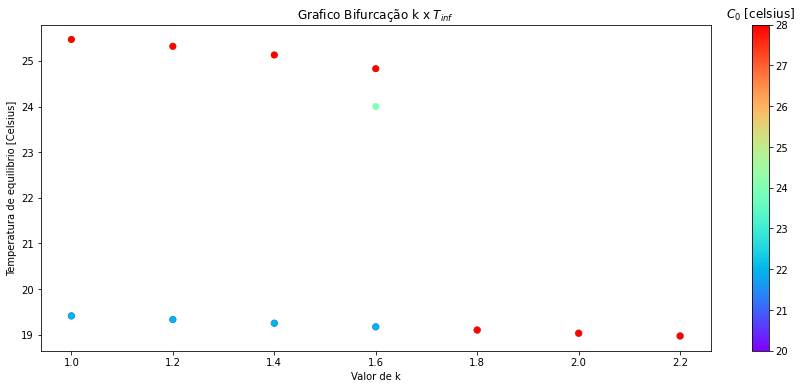

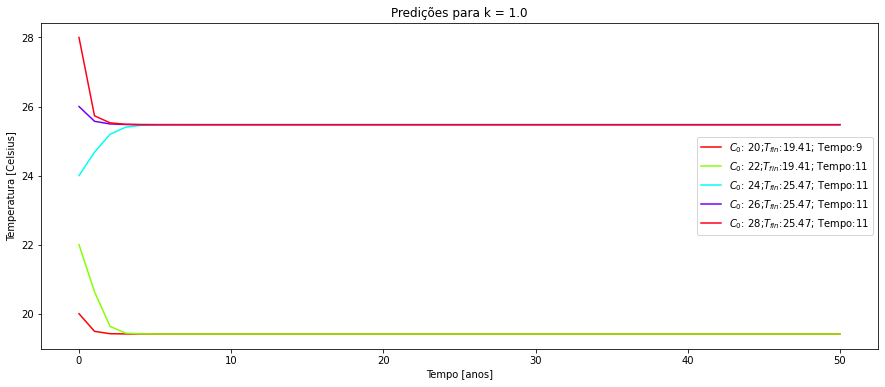

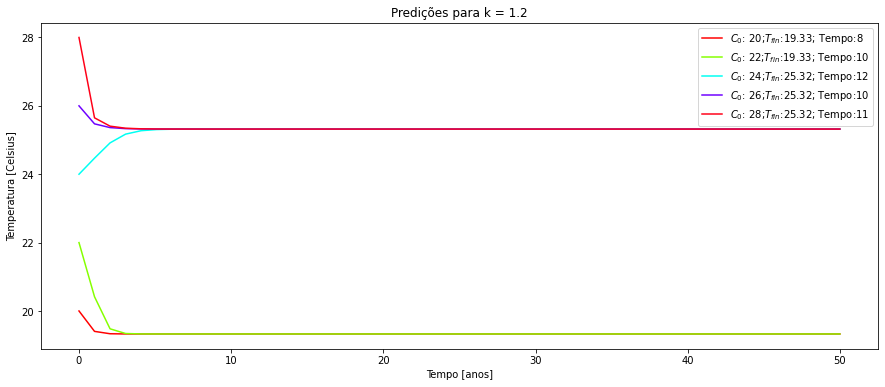

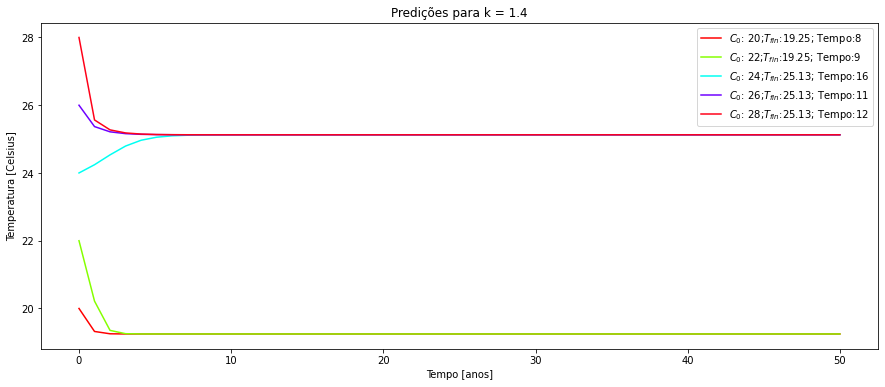

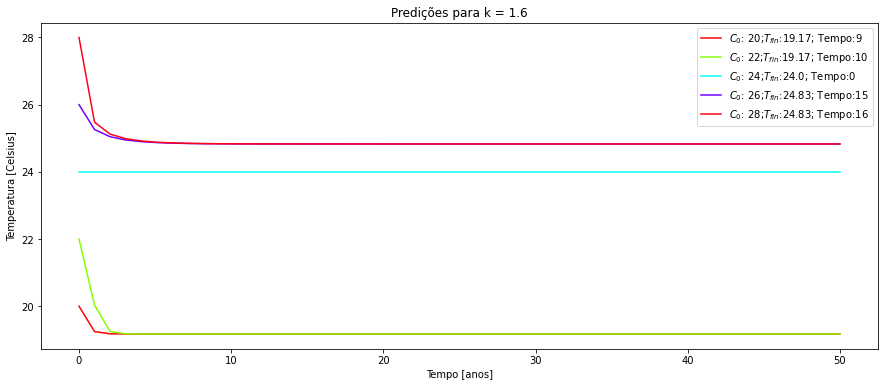

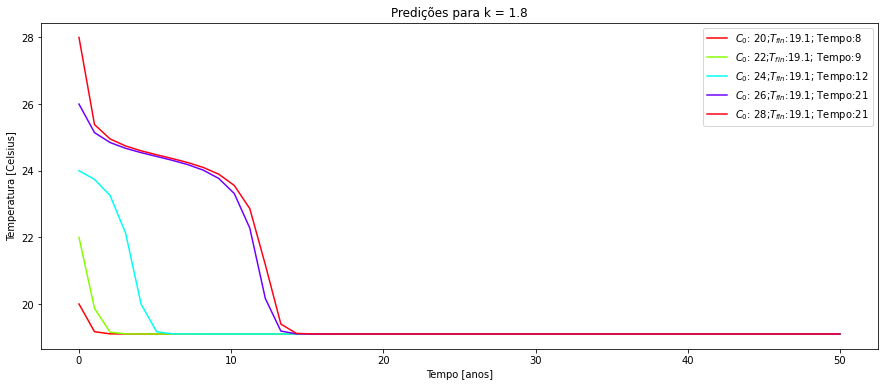

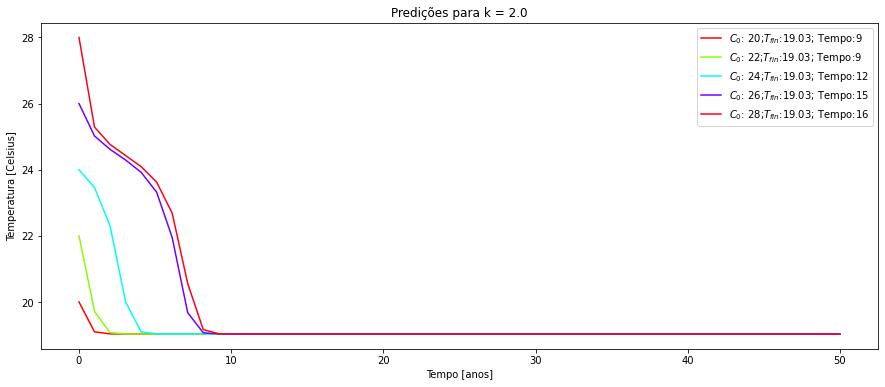

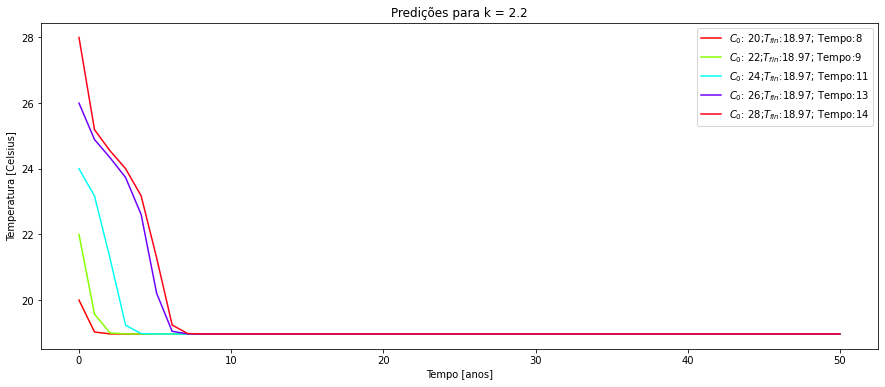

In [15]:
#PARTE 3- QUESTÂO 2

Lista_das_temperaturas = np.arange(20,30,2)                      # Declaração da lista de valores da temperatura, começando com 0 e chegando até 50, em intervalos de 50/10 graus
Lista_dos_valores_de_k = np.arange(1,2.4,0.2)                    # Declaração da lista de valores de ks, começando com -3 e chegando até 3, em intervalos regulares de 6/20
Parte_1.adquirir_valores_e_fazer_plots(Lista_dos_valores_de_k,Lista_das_temperaturas,flag_KxT=True,tipo =3)
Parte_1.adquirir_valores_e_fazer_plots(Lista_dos_valores_de_k,Lista_das_temperaturas,flag_quero_temp_equilibrio=True,flag_inverter=True,flag_KxT=True)

#PARTE 3 - Resposta da questão 3
É possivel ver através dos plots abaixo, que a temperatura vai permanecer constante, uma vez que o dC/dT vai ser zero, assim não há taxa de variação da temperatura, ou seja, a temperatura final será 20 graus celsius. Se acrescentarmos 0,1 graus a temperatura inicial, então ela retornará a 20 graus após um determinado intervalo de tempo. Logo a temperatura final não se modifica somente por ter sido acrescentado 0,1 graus a temperatura inicial.

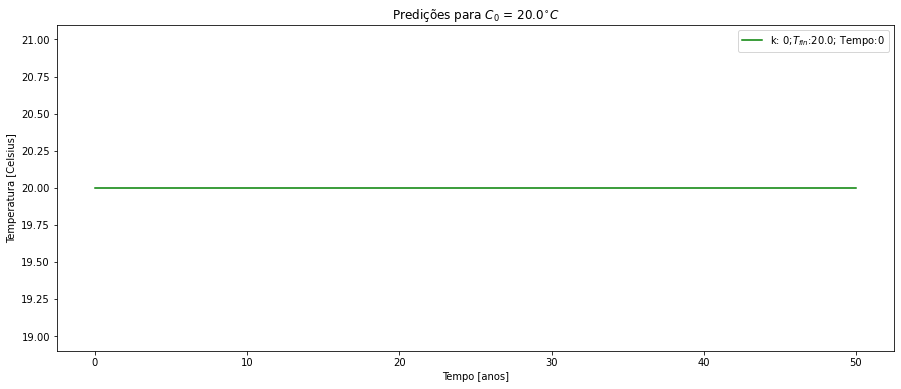

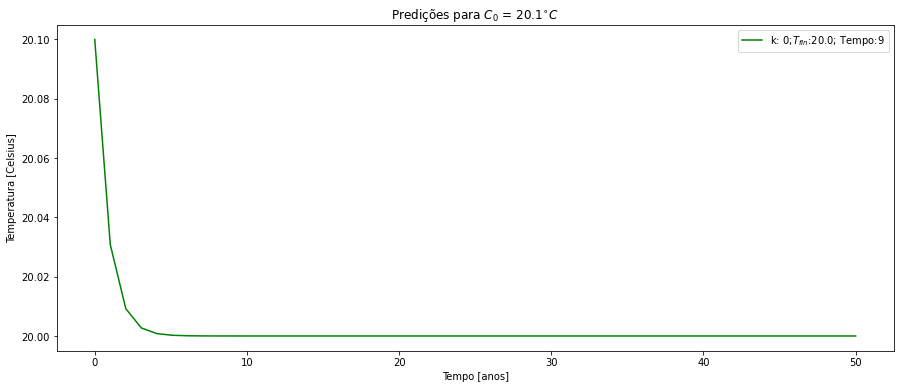

In [20]:
Lista_das_temperaturas = np.arange(20,20.1,0.1)                      # Declaração da lista de valores da temperatura, começando com 0 e chegando até 50, em intervalos de 50/10 graus
Parte_1.adquirir_valores_e_fazer_plots(0,Lista_das_temperaturas,flag_quero_temp_equilibrio=True,flag_inverter=False,flag_KxT=False)


#PARTE 3 - Resposta da questão 4.a)
Uma versão simplicada do código, feita somente para essa etapa, pode ser vista a seguir:
(A resposta da questão 4.a) está junto ao plot)

In [21]:

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
def codigo_parte_4():
  #Primeiro definimos a função DC, sendo ela
  def modelo(temperatura,t,valores_k):
    dcdt = (1/10)*(temperatura - 20)*(22- temperatura)*(temperatura - 26) - valores_k
    return dcdt
  temperatura = input("temperatura:")
  valor_k1 = float(input("Valor k_1:"))
  valor_k2 = float(input("valor k_2:"))
  anos = int(input("Intervalos em anos: "))
  #determinando o tempo
  t1 = np.linspace(0,anos)     #X anos de 1 em 1 ano
  t2 = np.linspace(anos,50)    #50-X anos partindo do X, de 1 em 1 ano 
  #Resolvendo a EDO
  print("Descrição do grafico abaixo:")
  print("Distribuição da temperatura ao logo dos anos, com temperatura inicial igual a ",temperatura," graus celsius e valor de k igual a ",valor_k1)
  print("Após ",anos," anos, o valor de k foi modificado para ",valor_k2," gerando assim o seguinte grafico:")
  y1 = odeint(modelo,temperatura,t1,args=(valor_k1,))
  y2 = odeint(modelo,temperatura,t2,args=(valor_k2,))
  plt.plot(t1,y1,label='k='+str(valor_k1))
  plt.plot(t2,y2,label='k='+str(valor_k2))
  plt.xlabel("Tempo [anos]")
  plt.ylabel("Temperatura [Celsius]")
  plt.title("Valor da temperatura modificando o k")
  plt.legend()
  plt.show()
  print("Informações pedidas pelo exercício:")
  print("A temperatura que estava na transição de k igual a ", valor_k1," para k igual a ",valor_k2," era de ",float(y1[-1])," graus celsius")
  print("A tendencia do grafico após os 5 anos é de:")

temperatura:21
Valor k_1:-0.5
valor k_2:-0.6
Intervalos em anos: 5
Descrição do grafico abaixo:
Distribuição da temperatura ao logo dos anos, com temperatura inicial igual a  21  graus celsius e valor de k igual a  -0.5
Após  5  anos, o valor de k foi modificado para  -0.6  gerando assim o seguinte grafico:


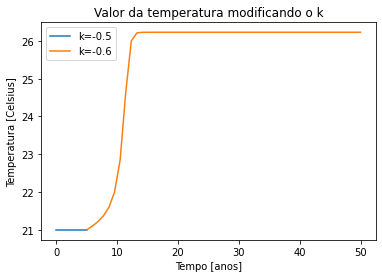

Informações pedidas pelo exercício:
A temperatura que estava na transição de k igual a  -0.5  para k igual a  -0.6  era de  21.0  graus celsius
A tendencia do grafico após os 5 anos é de:


In [22]:
#Só chamando a função
codigo_parte_4()